In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.4 MB/s eta 0:00:00


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
estimator = [('RF', RandomForestClassifier(n_estimators = 450, max_depth = 9)), ('XGB', XGBClassifier(n_estimators = 250,max_depth = 7, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1)),
             ('Cat', CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77)), ('LGBM', LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))]
Stacking = StackingClassifier( estimators=estimator, final_estimator= LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))

# **FastText**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bioinformatics/Antifreeze PP/FastText.csv')

**Imbalanced**

In [ ]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df[columns]
Y = df[target]

RF

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9)]
for model in models:
  for models in range (50):
    from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
    # evaluate model
    # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)

    # cm1 = confusion_matrix(y, y_pred)
    # report performance
    Accuracy = accuracy_score(ytest, pred)
    mcc = matthews_corrcoef(ytest, pred)

    kappa = cohen_kappa_score(ytest, pred)
    f1 = f1_score(ytest, pred)
    precision_score = precision_score(ytest, pred)
    recall_score = recall_score(ytest, pred)
    # y_pred = np.argmax(y_pred, axis=0)
    # auc = roc_auc_score(y, y_pred, multi_class='ovr')
    total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

  print(total_Metics)
  total_Metics.to_csv("total_Metics(FastText_Imbalanced).csv")

  # clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
  # prob = clf.fit_transform(X, Y)
  # pd.DataFrame(prob).to_csv("total_Metics_Probability(FastText_Imbalanced).csv")
  # print(prob)

                                           Classifier  Accuracy       mcc  \
0   (DecisionTreeClassifier(max_depth=9, max_featu...  0.952540  0.161540   
1   (DecisionTreeClassifier(max_depth=9, max_featu...  0.952540  0.161540   
2   (DecisionTreeClassifier(max_depth=9, max_featu...  0.952540  0.161540   
3   (DecisionTreeClassifier(max_depth=9, max_featu...  0.952540  0.161540   
4   (DecisionTreeClassifier(max_depth=9, max_featu...  0.952540  0.161540   
5   (DecisionTreeClassifier(max_depth=9, max_featu...  0.952540  0.161540   
6   (DecisionTreeClassifier(max_depth=9, max_featu...  0.952540  0.161540   
7   (DecisionTreeClassifier(max_depth=9, max_featu...  0.952540  0.161540   
8   (DecisionTreeClassifier(max_depth=9, max_featu...  0.952540  0.161540   
9   (DecisionTreeClassifier(max_depth=9, max_featu...  0.952540  0.161540   
10  (DecisionTreeClassifier(max_depth=9, max_featu...  0.952540  0.161540   
11  (DecisionTreeClassifier(max_depth=9, max_featu...  0.952540  0.161540   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**SMOTE**

In [ ]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df[columns]
Y = df[target]

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X, Y = sm.fit_resample(X, Y)

In [ ]:
# Y.to_csv('FastText_SMOTE.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
total_Metics['sensitivity'] = 'sensitivity'
total_Metics['specificity'] = 'specificity'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)
  cm1 = confusion_matrix(ytest, pred)
  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1, sensitivity,specificity]

print(total_Metics)
total_Metics.to_csv("total_Metics(FastText_SMOTE).csv")

0:	learn: 0.5999143	total: 122ms	remaining: 5.37s
1:	learn: 0.5422387	total: 187ms	remaining: 4.02s
2:	learn: 0.5033365	total: 248ms	remaining: 3.47s
3:	learn: 0.4696392	total: 313ms	remaining: 3.21s
4:	learn: 0.4456887	total: 382ms	remaining: 3.05s
5:	learn: 0.4265489	total: 445ms	remaining: 2.89s
6:	learn: 0.4084681	total: 508ms	remaining: 2.76s
7:	learn: 0.3924317	total: 572ms	remaining: 2.65s
8:	learn: 0.3752262	total: 640ms	remaining: 2.56s
9:	learn: 0.3580457	total: 705ms	remaining: 2.47s
10:	learn: 0.3464614	total: 780ms	remaining: 2.41s
11:	learn: 0.3313293	total: 846ms	remaining: 2.33s
12:	learn: 0.3173849	total: 908ms	remaining: 2.24s
13:	learn: 0.3041861	total: 970ms	remaining: 2.15s
14:	learn: 0.2884699	total: 1.04s	remaining: 2.08s
15:	learn: 0.2736841	total: 1.1s	remaining: 2s
16:	learn: 0.2579711	total: 1.17s	remaining: 1.93s
17:	learn: 0.2446232	total: 1.24s	remaining: 1.86s
18:	learn: 0.2328061	total: 1.31s	remaining: 1.79s
19:	learn: 0.2230413	total: 1.37s	remaining: 

XGB

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1)]
for model in models:
  for models in range (50):
    from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
    # evaluate model
    # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)

    # cm1 = confusion_matrix(y, y_pred)
    # report performance
    Accuracy = accuracy_score(ytest, pred)
    mcc = matthews_corrcoef(ytest, pred)

    kappa = cohen_kappa_score(ytest, pred)
    f1 = f1_score(ytest, pred)
    precision_score = precision_score(ytest, pred)
    recall_score = recall_score(ytest, pred)
    # y_pred = np.argmax(y_pred, axis=0)
    # auc = roc_auc_score(y, y_pred, multi_class='ovr')
    total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

  print(total_Metics)
  total_Metics.to_csv("total_Metics(FastText_SMOTE_XGB).csv")

                                           Classifier  Accuracy      mcc  \
0   XGBClassifier(base_score=0.1, booster=None, ca...  0.965414  0.93093   
1   XGBClassifier(base_score=0.1, booster=None, ca...  0.965414  0.93093   
2   XGBClassifier(base_score=0.1, booster=None, ca...  0.965414  0.93093   
3   XGBClassifier(base_score=0.1, booster=None, ca...  0.965414  0.93093   
4   XGBClassifier(base_score=0.1, booster=None, ca...  0.965414  0.93093   
5   XGBClassifier(base_score=0.1, booster=None, ca...  0.965414  0.93093   
6   XGBClassifier(base_score=0.1, booster=None, ca...  0.965414  0.93093   
7   XGBClassifier(base_score=0.1, booster=None, ca...  0.965414  0.93093   
8   XGBClassifier(base_score=0.1, booster=None, ca...  0.965414  0.93093   
9   XGBClassifier(base_score=0.1, booster=None, ca...  0.965414  0.93093   
10  XGBClassifier(base_score=0.1, booster=None, ca...  0.965414  0.93093   
11  XGBClassifier(base_score=0.1, booster=None, ca...  0.965414  0.93093   
12  XGBClass

CAT

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77)]
for model in models:
  for models in range (50):
    from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
    # evaluate model
    # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)

    # cm1 = confusion_matrix(y, y_pred)
    # report performance
    Accuracy = accuracy_score(ytest, pred)
    mcc = matthews_corrcoef(ytest, pred)

    kappa = cohen_kappa_score(ytest, pred)
    f1 = f1_score(ytest, pred)
    precision_score = precision_score(ytest, pred)
    recall_score = recall_score(ytest, pred)
    # y_pred = np.argmax(y_pred, axis=0)
    # auc = roc_auc_score(y, y_pred, multi_class='ovr')
    total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

  print(total_Metics)
  total_Metics.to_csv("total_Metics(FastText_SMOTE_CAT).csv")

0:	learn: 0.5957303	total: 125ms	remaining: 5.5s
1:	learn: 0.5422305	total: 258ms	remaining: 5.54s
2:	learn: 0.5023856	total: 386ms	remaining: 5.41s
3:	learn: 0.4709498	total: 521ms	remaining: 5.34s
4:	learn: 0.4466881	total: 674ms	remaining: 5.39s
5:	learn: 0.4276491	total: 821ms	remaining: 5.34s
6:	learn: 0.4106242	total: 985ms	remaining: 5.35s
7:	learn: 0.3914711	total: 1.13s	remaining: 5.22s
8:	learn: 0.3736340	total: 1.27s	remaining: 5.07s
9:	learn: 0.3562547	total: 1.41s	remaining: 4.95s
10:	learn: 0.3425542	total: 1.54s	remaining: 4.77s
11:	learn: 0.3251506	total: 1.71s	remaining: 4.71s
12:	learn: 0.3096129	total: 1.86s	remaining: 4.57s
13:	learn: 0.2964257	total: 2s	remaining: 4.44s
14:	learn: 0.2838618	total: 2.15s	remaining: 4.3s
15:	learn: 0.2692696	total: 2.28s	remaining: 4.14s
16:	learn: 0.2557841	total: 2.43s	remaining: 4s
17:	learn: 0.2435013	total: 2.58s	remaining: 3.87s
18:	learn: 0.2316688	total: 2.73s	remaining: 3.73s
19:	learn: 0.2203182	total: 2.86s	remaining: 3.58

LGB

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75)]
for model in models:
  for models in range (50):
    from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
    # evaluate model
    # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)

    # cm1 = confusion_matrix(y, y_pred)
    # report performance
    Accuracy = accuracy_score(ytest, pred)
    mcc = matthews_corrcoef(ytest, pred)

    kappa = cohen_kappa_score(ytest, pred)
    f1 = f1_score(ytest, pred)
    precision_score = precision_score(ytest, pred)
    recall_score = recall_score(ytest, pred)
    # y_pred = np.argmax(y_pred, axis=0)
    # auc = roc_auc_score(y, y_pred, multi_class='ovr')
    total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

  print(total_Metics)
  total_Metics.to_csv("total_Metics(FastText_SMOTE_LGB).csv")

                                           Classifier  Accuracy       mcc  \
0   LGBMClassifier(learning_rate=0.09, max_depth=5...  0.978055  0.956136   
1   LGBMClassifier(learning_rate=0.09, max_depth=5...  0.978055  0.956136   
2   LGBMClassifier(learning_rate=0.09, max_depth=5...  0.978055  0.956136   
3   LGBMClassifier(learning_rate=0.09, max_depth=5...  0.978055  0.956136   
4   LGBMClassifier(learning_rate=0.09, max_depth=5...  0.978055  0.956136   
5   LGBMClassifier(learning_rate=0.09, max_depth=5...  0.978055  0.956136   
6   LGBMClassifier(learning_rate=0.09, max_depth=5...  0.978055  0.956136   
7   LGBMClassifier(learning_rate=0.09, max_depth=5...  0.978055  0.956136   
8   LGBMClassifier(learning_rate=0.09, max_depth=5...  0.978055  0.956136   
9   LGBMClassifier(learning_rate=0.09, max_depth=5...  0.978055  0.956136   
10  LGBMClassifier(learning_rate=0.09, max_depth=5...  0.978055  0.956136   
11  LGBMClassifier(learning_rate=0.09, max_depth=5...  0.978055  0.956136   

**ADASYN**

In [ ]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df[columns]
Y = df[target]

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X, Y = ada.fit_resample(X, Y)

In [ ]:
Y.to_csv('FastText_Adasyn.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(FastText_ADASYN).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(FastText_ADASYN).csv")
print(prob)

0:	learn: 0.6096462	total: 145ms	remaining: 6.38s
1:	learn: 0.5541880	total: 223ms	remaining: 4.8s
2:	learn: 0.5137142	total: 304ms	remaining: 4.26s
3:	learn: 0.4856558	total: 387ms	remaining: 3.96s
4:	learn: 0.4625287	total: 465ms	remaining: 3.72s
5:	learn: 0.4392480	total: 546ms	remaining: 3.55s
6:	learn: 0.4214995	total: 639ms	remaining: 3.47s
7:	learn: 0.4008988	total: 721ms	remaining: 3.33s
8:	learn: 0.3865038	total: 802ms	remaining: 3.21s
9:	learn: 0.3695595	total: 889ms	remaining: 3.11s
10:	learn: 0.3546974	total: 975ms	remaining: 3.01s
11:	learn: 0.3375982	total: 1.05s	remaining: 2.9s
12:	learn: 0.3233449	total: 1.14s	remaining: 2.81s
13:	learn: 0.3078837	total: 1.22s	remaining: 2.71s
14:	learn: 0.2921740	total: 1.3s	remaining: 2.6s
15:	learn: 0.2772356	total: 1.38s	remaining: 2.5s
16:	learn: 0.2634127	total: 1.47s	remaining: 2.42s
17:	learn: 0.2503916	total: 1.55s	remaining: 2.33s
18:	learn: 0.2382527	total: 1.65s	remaining: 2.25s
19:	learn: 0.2262378	total: 1.73s	remaining: 2

**BorderlineSMOTE OS**

In [ ]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df[columns]
Y = df[target]

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
bsm = BorderlineSMOTE(random_state=42)
X, Y = bsm.fit_resample(X, Y)

In [ ]:
Y.to_csv('FastText_BSMOTE.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(FastText_BSMOTE).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(FastText_BSMOTE).csv")
print(prob)

0:	learn: 0.5927630	total: 102ms	remaining: 4.49s
1:	learn: 0.5331926	total: 180ms	remaining: 3.86s
2:	learn: 0.4968401	total: 258ms	remaining: 3.61s
3:	learn: 0.4685616	total: 346ms	remaining: 3.54s
4:	learn: 0.4418549	total: 426ms	remaining: 3.41s
5:	learn: 0.4225974	total: 508ms	remaining: 3.3s
6:	learn: 0.4035027	total: 589ms	remaining: 3.2s
7:	learn: 0.3852473	total: 667ms	remaining: 3.08s
8:	learn: 0.3651845	total: 744ms	remaining: 2.98s
9:	learn: 0.3483361	total: 826ms	remaining: 2.89s
10:	learn: 0.3349203	total: 902ms	remaining: 2.79s
11:	learn: 0.3196497	total: 981ms	remaining: 2.7s
12:	learn: 0.3055272	total: 1.06s	remaining: 2.6s
13:	learn: 0.2922832	total: 1.14s	remaining: 2.51s
14:	learn: 0.2749844	total: 1.22s	remaining: 2.43s
15:	learn: 0.2596360	total: 1.3s	remaining: 2.35s
16:	learn: 0.2479202	total: 1.41s	remaining: 2.32s
17:	learn: 0.2347206	total: 1.49s	remaining: 2.23s
18:	learn: 0.2231545	total: 1.57s	remaining: 2.15s
19:	learn: 0.2103895	total: 1.65s	remaining: 2

**SMOTEN**

In [ ]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df[columns]
Y = df[target]

In [ ]:
from imblearn.over_sampling import SMOTEN
smn = SMOTEN()
X, Y = smn.fit_resample(X, Y)

In [ ]:
Y.to_csv('FastText_SMOTEN.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(FastText_SMOTEN).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(FastText_SMOTEN).csv")
print(prob)

0:	learn: 0.1213848	total: 241ms	remaining: 10.6s
1:	learn: 0.1071422	total: 429ms	remaining: 9.23s
2:	learn: 0.1001129	total: 622ms	remaining: 8.71s
3:	learn: 0.0963429	total: 790ms	remaining: 8.09s
4:	learn: 0.0934608	total: 961ms	remaining: 7.69s
5:	learn: 0.0892135	total: 1.14s	remaining: 7.39s
6:	learn: 0.0875601	total: 1.31s	remaining: 7.1s
7:	learn: 0.0861634	total: 1.49s	remaining: 6.89s
8:	learn: 0.0849759	total: 1.64s	remaining: 6.57s
9:	learn: 0.0825372	total: 1.81s	remaining: 6.34s
10:	learn: 0.0786051	total: 2.01s	remaining: 6.21s
11:	learn: 0.0767895	total: 2.18s	remaining: 6s
12:	learn: 0.0739671	total: 2.35s	remaining: 5.79s
13:	learn: 0.0714643	total: 2.52s	remaining: 5.58s
14:	learn: 0.0690961	total: 2.69s	remaining: 5.38s
15:	learn: 0.0663530	total: 2.8s	remaining: 5.07s
16:	learn: 0.0637677	total: 2.89s	remaining: 4.76s
17:	learn: 0.0613612	total: 2.98s	remaining: 4.47s
18:	learn: 0.0597917	total: 3.07s	remaining: 4.2s
19:	learn: 0.0563348	total: 3.16s	remaining: 3.

**SMOTETomek COM**

In [ ]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df[columns]
Y = df[target]

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X, Y = smt.fit_resample(X, Y)

In [ ]:
Y.to_csv('FastText_SMOTETomek.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(FastText_SMOTETomek).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(FastText_SMOTETomek).csv")
print(prob)

0:	learn: 0.6028983	total: 97.2ms	remaining: 4.28s
1:	learn: 0.5450386	total: 175ms	remaining: 3.75s
2:	learn: 0.5092999	total: 251ms	remaining: 3.51s
3:	learn: 0.4819506	total: 332ms	remaining: 3.4s
4:	learn: 0.4579886	total: 411ms	remaining: 3.29s
5:	learn: 0.4374639	total: 485ms	remaining: 3.15s
6:	learn: 0.4170498	total: 564ms	remaining: 3.06s
7:	learn: 0.4004597	total: 644ms	remaining: 2.98s
8:	learn: 0.3822340	total: 721ms	remaining: 2.88s
9:	learn: 0.3662179	total: 802ms	remaining: 2.81s
10:	learn: 0.3506372	total: 877ms	remaining: 2.71s
11:	learn: 0.3381381	total: 964ms	remaining: 2.65s
12:	learn: 0.3253574	total: 1.04s	remaining: 2.56s
13:	learn: 0.3093721	total: 1.12s	remaining: 2.48s
14:	learn: 0.2943785	total: 1.2s	remaining: 2.39s
15:	learn: 0.2792852	total: 1.28s	remaining: 2.31s
16:	learn: 0.2665985	total: 1.35s	remaining: 2.23s
17:	learn: 0.2538362	total: 1.43s	remaining: 2.15s
18:	learn: 0.2424372	total: 1.51s	remaining: 2.07s
19:	learn: 0.2318857	total: 1.59s	remainin

 **NearMiss**

In [ ]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df[columns]
Y = df[target]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
Y.to_csv('FastText_Nearmiss.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(FastText_NearMiss).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(FastText_NearMiss).csv")
print(prob)

0:	learn: 0.4413630	total: 132ms	remaining: 5.81s
1:	learn: 0.3156884	total: 204ms	remaining: 4.38s
2:	learn: 0.2392057	total: 273ms	remaining: 3.82s
3:	learn: 0.1745888	total: 346ms	remaining: 3.54s
4:	learn: 0.1464550	total: 415ms	remaining: 3.32s
5:	learn: 0.1095822	total: 484ms	remaining: 3.14s
6:	learn: 0.0836487	total: 556ms	remaining: 3.02s
7:	learn: 0.0647408	total: 623ms	remaining: 2.88s
8:	learn: 0.0515308	total: 694ms	remaining: 2.78s
9:	learn: 0.0416522	total: 768ms	remaining: 2.69s
10:	learn: 0.0337239	total: 842ms	remaining: 2.6s
11:	learn: 0.0278285	total: 910ms	remaining: 2.5s
12:	learn: 0.0228626	total: 992ms	remaining: 2.44s
13:	learn: 0.0186857	total: 1.06s	remaining: 2.35s
14:	learn: 0.0159475	total: 1.13s	remaining: 2.26s
15:	learn: 0.0137206	total: 1.2s	remaining: 2.18s
16:	learn: 0.0124638	total: 1.27s	remaining: 2.1s
17:	learn: 0.0110508	total: 1.34s	remaining: 2.02s
18:	learn: 0.0100435	total: 1.42s	remaining: 1.95s
19:	learn: 0.0091926	total: 1.49s	remaining: 

**TomekLinks US**

In [ ]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df[columns]
Y = df[target]

In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X, Y = tl.fit_resample(X, Y)

In [ ]:
Y.to_csv('FastText_TL.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(FastText_TomekLinks).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(FastText_TomekLinks).csv")
print(prob)

0:	learn: 0.2122950	total: 185ms	remaining: 8.15s
1:	learn: 0.1912461	total: 277ms	remaining: 5.95s
2:	learn: 0.1868129	total: 385ms	remaining: 5.39s
3:	learn: 0.1805625	total: 494ms	remaining: 5.07s
4:	learn: 0.1752813	total: 612ms	remaining: 4.9s
5:	learn: 0.1696059	total: 744ms	remaining: 4.83s
6:	learn: 0.1656258	total: 867ms	remaining: 4.71s
7:	learn: 0.1606260	total: 1.01s	remaining: 4.69s
8:	learn: 0.1554407	total: 1.14s	remaining: 4.57s
9:	learn: 0.1521243	total: 1.25s	remaining: 4.38s
10:	learn: 0.1475180	total: 1.38s	remaining: 4.28s
11:	learn: 0.1426909	total: 1.53s	remaining: 4.21s
12:	learn: 0.1375714	total: 1.68s	remaining: 4.13s
13:	learn: 0.1328654	total: 1.82s	remaining: 4.03s
14:	learn: 0.1283746	total: 1.96s	remaining: 3.91s
15:	learn: 0.1234674	total: 2.1s	remaining: 3.81s
16:	learn: 0.1179814	total: 2.23s	remaining: 3.68s
17:	learn: 0.1141869	total: 2.37s	remaining: 3.56s
18:	learn: 0.1099041	total: 2.52s	remaining: 3.45s
19:	learn: 0.1052210	total: 2.67s	remaining

**ENN US**

In [ ]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df[columns]
Y = df[target]

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X, Y = enn.fit_resample(X, Y)

In [ ]:
Y.to_csv('FastText_ENN.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(FastText_ENN).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(FastText_ENN).csv")
print(prob)

0:	learn: 0.3975861	total: 92.5ms	remaining: 4.07s
1:	learn: 0.3735627	total: 155ms	remaining: 3.33s
2:	learn: 0.3543206	total: 217ms	remaining: 3.03s
3:	learn: 0.3370298	total: 279ms	remaining: 2.86s
4:	learn: 0.3248156	total: 346ms	remaining: 2.77s
5:	learn: 0.3120747	total: 408ms	remaining: 2.65s
6:	learn: 0.2952250	total: 472ms	remaining: 2.56s
7:	learn: 0.2816925	total: 538ms	remaining: 2.49s
8:	learn: 0.2655291	total: 603ms	remaining: 2.41s
9:	learn: 0.2504621	total: 667ms	remaining: 2.33s
10:	learn: 0.2364093	total: 735ms	remaining: 2.27s
11:	learn: 0.2216830	total: 809ms	remaining: 2.22s
12:	learn: 0.2077401	total: 872ms	remaining: 2.15s
13:	learn: 0.1951121	total: 938ms	remaining: 2.08s
14:	learn: 0.1883620	total: 1s	remaining: 2s
15:	learn: 0.1731655	total: 1.08s	remaining: 1.96s
16:	learn: 0.1611833	total: 1.14s	remaining: 1.88s
17:	learn: 0.1473359	total: 1.21s	remaining: 1.81s
18:	learn: 0.1392102	total: 1.27s	remaining: 1.74s
19:	learn: 0.1265850	total: 1.34s	remaining: 1

**OneSideSelection US**

In [ ]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df[columns]
Y = df[target]

In [ ]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=42)
X, Y = oss.fit_resample(X, Y)

In [ ]:
Y.to_csv('FastText_OSS.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(FastText_OSS).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(FastText_OSS).csv")
print(prob)

0:	learn: 0.2053369	total: 90.8ms	remaining: 4s
1:	learn: 0.1867372	total: 161ms	remaining: 3.47s
2:	learn: 0.1797348	total: 233ms	remaining: 3.27s
3:	learn: 0.1761224	total: 309ms	remaining: 3.17s
4:	learn: 0.1684530	total: 377ms	remaining: 3.02s
5:	learn: 0.1647190	total: 445ms	remaining: 2.89s
6:	learn: 0.1608066	total: 519ms	remaining: 2.82s
7:	learn: 0.1559036	total: 587ms	remaining: 2.71s
8:	learn: 0.1514237	total: 659ms	remaining: 2.63s
9:	learn: 0.1463487	total: 741ms	remaining: 2.59s
10:	learn: 0.1410649	total: 817ms	remaining: 2.53s
11:	learn: 0.1362294	total: 896ms	remaining: 2.46s
12:	learn: 0.1317392	total: 968ms	remaining: 2.38s
13:	learn: 0.1275914	total: 1.04s	remaining: 2.3s
14:	learn: 0.1207213	total: 1.11s	remaining: 2.22s
15:	learn: 0.1165607	total: 1.18s	remaining: 2.14s
16:	learn: 0.1120046	total: 1.26s	remaining: 2.08s
17:	learn: 0.1083466	total: 1.33s	remaining: 1.99s
18:	learn: 0.1027979	total: 1.4s	remaining: 1.92s
19:	learn: 0.0975203	total: 1.48s	remaining: 

**RandomUnderSampler**

In [ ]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df[columns]
Y = df[target]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X, Y = rus.fit_resample(X, Y)

In [ ]:
Y.to_csv('FastText_RUS.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(FastText_RUS).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(FastText_RUS).csv")
print(prob)

0:	learn: 0.6330743	total: 168ms	remaining: 7.38s
1:	learn: 0.5977295	total: 263ms	remaining: 5.66s
2:	learn: 0.5545949	total: 378ms	remaining: 5.29s
3:	learn: 0.5105972	total: 503ms	remaining: 5.16s
4:	learn: 0.4810368	total: 655ms	remaining: 5.24s
5:	learn: 0.4417910	total: 788ms	remaining: 5.12s
6:	learn: 0.3903758	total: 957ms	remaining: 5.19s
7:	learn: 0.3664103	total: 1.11s	remaining: 5.13s
8:	learn: 0.3330215	total: 1.32s	remaining: 5.27s
9:	learn: 0.2928983	total: 1.54s	remaining: 5.41s
10:	learn: 0.2533802	total: 1.77s	remaining: 5.46s
11:	learn: 0.2156422	total: 1.98s	remaining: 5.44s
12:	learn: 0.1787403	total: 2.2s	remaining: 5.42s
13:	learn: 0.1478773	total: 2.42s	remaining: 5.36s
14:	learn: 0.1240290	total: 2.64s	remaining: 5.27s
15:	learn: 0.1020033	total: 2.82s	remaining: 5.1s
16:	learn: 0.0855475	total: 3.01s	remaining: 4.95s
17:	learn: 0.0754630	total: 3.22s	remaining: 4.82s
18:	learn: 0.0656499	total: 3.42s	remaining: 4.69s
19:	learn: 0.0582565	total: 3.64s	remaining

# **Word2Vec**

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Bioinformatics/Antifreeze PP/Wor2Vec.csv')

**Imbalanced**

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Word2Vec_Imbalanced).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Word2Vec_Imbalanced).csv")
print(prob)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2118629	total: 134ms	remaining: 5.92s
1:	learn: 0.1953014	total: 203ms	remaining: 4.37s
2:	learn: 0.1909326	total: 269ms	remaining: 3.77s
3:	learn: 0.1873130	total: 342ms	remaining: 3.5s
4:	learn: 0.1824310	total: 413ms	remaining: 3.3s
5:	learn: 0.1769397	total: 480ms	remaining: 3.12s
6:	learn: 0.1733258	total: 547ms	remaining: 2.97s
7:	learn: 0.1711151	total: 620ms	remaining: 2.87s
8:	learn: 0.1685301	total: 689ms	remaining: 2.76s
9:	learn: 0.1653601	total: 758ms	remaining: 2.65s
10:	learn: 0.1627092	total: 827ms	remaining: 2.55s
11:	learn: 0.1578233	total: 897ms	remaining: 2.47s
12:	learn: 0.1533546	total: 966ms	remaining: 2.38s
13:	learn: 0.1483962	total: 1.04s	remaining: 2.29s
14:	learn: 0.1439128	total: 1.1s	remaining: 2.2s
15:	learn: 0.1396007	total: 1.17s	remaining: 2.13s
16:	learn: 0.1356930	total: 1.24s	remaining: 2.04s
17:	learn: 0.1322412	total: 1.3s	remaining: 1.96s
18:	learn: 0.1279544	total: 1.37s	remaining: 1.88s
19:	learn: 0.1247706	total: 1.44s	remaining: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2118629	total: 86.7ms	remaining: 3.81s
1:	learn: 0.1953014	total: 165ms	remaining: 3.56s
2:	learn: 0.1909326	total: 231ms	remaining: 3.23s
3:	learn: 0.1873130	total: 303ms	remaining: 3.1s
4:	learn: 0.1824310	total: 369ms	remaining: 2.95s
5:	learn: 0.1769397	total: 436ms	remaining: 2.84s
6:	learn: 0.1733258	total: 502ms	remaining: 2.72s
7:	learn: 0.1711151	total: 569ms	remaining: 2.63s
8:	learn: 0.1685301	total: 634ms	remaining: 2.54s
9:	learn: 0.1653601	total: 701ms	remaining: 2.45s
10:	learn: 0.1627092	total: 765ms	remaining: 2.37s
11:	learn: 0.1578233	total: 836ms	remaining: 2.3s
12:	learn: 0.1533546	total: 903ms	remaining: 2.22s
13:	learn: 0.1483962	total: 968ms	remaining: 2.14s
14:	learn: 0.1439128	total: 1.03s	remaining: 2.07s
15:	learn: 0.1396007	total: 1.1s	remaining: 2s
16:	learn: 0.1356930	total: 1.18s	remaining: 1.94s
17:	learn: 0.1322412	total: 1.24s	remaining: 1.86s
18:	learn: 0.1279544	total: 1.31s	remaining: 1.8s
19:	learn: 0.1247706	total: 1.39s	remaining: 1.

**SMOTE**

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X, Y = sm.fit_resample(X, Y)

In [ ]:
Y.to_csv('Word2Vec_SMOTE.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
total_Metics['sensitivity'] = 'sensitivity'
total_Metics['specificity'] = 'specificity'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)
  cm1 = confusion_matrix(ytest, pred)
  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1, sensitivity,specificity]

print(total_Metics)
total_Metics.to_csv("total_Metics(Word2Vec_SMOTE).csv")

0:	learn: 0.6251833	total: 130ms	remaining: 5.73s
1:	learn: 0.5679455	total: 240ms	remaining: 5.15s
2:	learn: 0.5245108	total: 347ms	remaining: 4.86s
3:	learn: 0.4874076	total: 454ms	remaining: 4.66s
4:	learn: 0.4520055	total: 526ms	remaining: 4.21s
5:	learn: 0.4256652	total: 587ms	remaining: 3.81s
6:	learn: 0.4014139	total: 644ms	remaining: 3.5s
7:	learn: 0.3765470	total: 703ms	remaining: 3.25s
8:	learn: 0.3565619	total: 762ms	remaining: 3.05s
9:	learn: 0.3367682	total: 824ms	remaining: 2.88s
10:	learn: 0.3186717	total: 886ms	remaining: 2.74s
11:	learn: 0.2987351	total: 946ms	remaining: 2.6s
12:	learn: 0.2810179	total: 1s	remaining: 2.47s
13:	learn: 0.2650379	total: 1.07s	remaining: 2.37s
14:	learn: 0.2511409	total: 1.13s	remaining: 2.26s
15:	learn: 0.2391694	total: 1.19s	remaining: 2.15s
16:	learn: 0.2264558	total: 1.24s	remaining: 2.05s
17:	learn: 0.2154086	total: 1.3s	remaining: 1.96s
18:	learn: 0.2027075	total: 1.36s	remaining: 1.86s
19:	learn: 0.1919401	total: 1.42s	remaining: 1.

**ADASYN**

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(sampling_strategy=1)
X, Y = ada.fit_resample(X, Y)

In [ ]:
Y.to_csv('Word2Vec_Adasyn.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Word2Vec_ADASYN).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Word2Vec_ADASYN).csv")
print(prob)

0:	learn: 0.6251516	total: 119ms	remaining: 5.21s
1:	learn: 0.5704800	total: 209ms	remaining: 4.5s
2:	learn: 0.5247193	total: 297ms	remaining: 4.16s
3:	learn: 0.4827330	total: 392ms	remaining: 4.02s
4:	learn: 0.4485342	total: 485ms	remaining: 3.88s
5:	learn: 0.4203790	total: 574ms	remaining: 3.73s
6:	learn: 0.3960917	total: 667ms	remaining: 3.62s
7:	learn: 0.3733345	total: 759ms	remaining: 3.51s
8:	learn: 0.3493737	total: 858ms	remaining: 3.43s
9:	learn: 0.3298513	total: 957ms	remaining: 3.35s
10:	learn: 0.3122100	total: 1.05s	remaining: 3.24s
11:	learn: 0.2951168	total: 1.14s	remaining: 3.14s
12:	learn: 0.2807001	total: 1.24s	remaining: 3.04s
13:	learn: 0.2653311	total: 1.33s	remaining: 2.94s
14:	learn: 0.2500203	total: 1.41s	remaining: 2.83s
15:	learn: 0.2365642	total: 1.51s	remaining: 2.73s
16:	learn: 0.2244071	total: 1.6s	remaining: 2.63s
17:	learn: 0.2133867	total: 1.69s	remaining: 2.53s
18:	learn: 0.2034334	total: 1.78s	remaining: 2.43s
19:	learn: 0.1934055	total: 1.89s	remaining

**BorderlineSMOTE OS**

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
bsm = BorderlineSMOTE(random_state=42)
X, Y = bsm.fit_resample(X, Y)

In [ ]:
Y.to_csv('Word2Vec_BSMOTE.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Word2Vec_BSMOTE).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Word2Vec_BSMOTE).csv")
print(prob)

0:	learn: 0.6224766	total: 96.3ms	remaining: 4.24s
1:	learn: 0.5630873	total: 174ms	remaining: 3.74s
2:	learn: 0.5113677	total: 248ms	remaining: 3.47s
3:	learn: 0.4683532	total: 327ms	remaining: 3.35s
4:	learn: 0.4331532	total: 401ms	remaining: 3.21s
5:	learn: 0.4022627	total: 484ms	remaining: 3.14s
6:	learn: 0.3762343	total: 560ms	remaining: 3.04s
7:	learn: 0.3533068	total: 636ms	remaining: 2.94s
8:	learn: 0.3329729	total: 708ms	remaining: 2.83s
9:	learn: 0.3114104	total: 789ms	remaining: 2.76s
10:	learn: 0.2935932	total: 862ms	remaining: 2.66s
11:	learn: 0.2774513	total: 935ms	remaining: 2.57s
12:	learn: 0.2624986	total: 1.01s	remaining: 2.49s
13:	learn: 0.2484871	total: 1.08s	remaining: 2.4s
14:	learn: 0.2337081	total: 1.16s	remaining: 2.32s
15:	learn: 0.2203315	total: 1.23s	remaining: 2.24s
16:	learn: 0.2079592	total: 1.3s	remaining: 2.15s
17:	learn: 0.1965536	total: 1.38s	remaining: 2.07s
18:	learn: 0.1854714	total: 1.46s	remaining: 2s
19:	learn: 0.1759209	total: 1.54s	remaining: 

**SMOTEN**

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.over_sampling import SMOTEN
smn = SMOTEN()
X, Y = smn.fit_resample(X, Y)

In [ ]:
Y.to_csv('Word2Vec_SMOTEN.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Word2Vec_SMOTEN).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Word2Vec_SMOTEN).csv")
print(prob)

0:	learn: 0.1461705	total: 117ms	remaining: 5.15s
1:	learn: 0.1150223	total: 217ms	remaining: 4.66s
2:	learn: 0.1098701	total: 316ms	remaining: 4.43s
3:	learn: 0.1077984	total: 408ms	remaining: 4.18s
4:	learn: 0.1063116	total: 502ms	remaining: 4.02s
5:	learn: 0.1026815	total: 603ms	remaining: 3.92s
6:	learn: 0.1000476	total: 691ms	remaining: 3.75s
7:	learn: 0.0986092	total: 776ms	remaining: 3.59s
8:	learn: 0.0954495	total: 870ms	remaining: 3.48s
9:	learn: 0.0934934	total: 955ms	remaining: 3.34s
10:	learn: 0.0917872	total: 1.04s	remaining: 3.21s
11:	learn: 0.0893688	total: 1.13s	remaining: 3.11s
12:	learn: 0.0868332	total: 1.21s	remaining: 2.99s
13:	learn: 0.0844176	total: 1.3s	remaining: 2.88s
14:	learn: 0.0819283	total: 1.4s	remaining: 2.79s
15:	learn: 0.0801159	total: 1.5s	remaining: 2.73s
16:	learn: 0.0779130	total: 1.59s	remaining: 2.62s
17:	learn: 0.0745840	total: 1.68s	remaining: 2.52s
18:	learn: 0.0720531	total: 1.77s	remaining: 2.42s
19:	learn: 0.0701813	total: 1.85s	remaining:

**SMOTETomek COM**

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X, Y = smt.fit_resample(X, Y)

In [ ]:
Y.to_csv('Word2Vec_SMOTETomek.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Word2Vec_SMOTETomek).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Word2Vec_SMOTETomek).csv")
print(prob)

0:	learn: 0.6257681	total: 256ms	remaining: 11.3s
1:	learn: 0.5696462	total: 420ms	remaining: 9.02s
2:	learn: 0.5262087	total: 571ms	remaining: 7.99s
3:	learn: 0.4885318	total: 746ms	remaining: 7.64s
4:	learn: 0.4547691	total: 928ms	remaining: 7.42s
5:	learn: 0.4268279	total: 1.1s	remaining: 7.15s
6:	learn: 0.4015454	total: 1.28s	remaining: 6.96s
7:	learn: 0.3773265	total: 1.45s	remaining: 6.69s
8:	learn: 0.3558133	total: 1.62s	remaining: 6.48s
9:	learn: 0.3345417	total: 1.78s	remaining: 6.23s
10:	learn: 0.3161022	total: 1.97s	remaining: 6.1s
11:	learn: 0.2978315	total: 2.13s	remaining: 5.87s
12:	learn: 0.2829303	total: 2.31s	remaining: 5.68s
13:	learn: 0.2672236	total: 2.49s	remaining: 5.51s
14:	learn: 0.2545365	total: 2.67s	remaining: 5.34s
15:	learn: 0.2401715	total: 2.84s	remaining: 5.14s
16:	learn: 0.2259807	total: 3.03s	remaining: 5s
17:	learn: 0.2131749	total: 3.21s	remaining: 4.81s
18:	learn: 0.2027891	total: 3.38s	remaining: 4.63s
19:	learn: 0.1917724	total: 3.54s	remaining: 4

**NearMiss**

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
Y.to_csv('Word2Vec_Nearmiss.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Word2Vec_NearMiss).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Word2Vec_NearMiss).csv")
print(prob)

0:	learn: 0.6493890	total: 207ms	remaining: 9.1s
1:	learn: 0.6127594	total: 299ms	remaining: 6.43s
2:	learn: 0.5874042	total: 415ms	remaining: 5.82s
3:	learn: 0.5405878	total: 509ms	remaining: 5.22s
4:	learn: 0.5078520	total: 596ms	remaining: 4.76s
5:	learn: 0.4638819	total: 682ms	remaining: 4.44s
6:	learn: 0.4394135	total: 780ms	remaining: 4.24s
7:	learn: 0.4137858	total: 864ms	remaining: 4s
8:	learn: 0.3856354	total: 975ms	remaining: 3.9s
9:	learn: 0.3429707	total: 1.08s	remaining: 3.77s
10:	learn: 0.3000656	total: 1.2s	remaining: 3.71s
11:	learn: 0.2647811	total: 1.28s	remaining: 3.53s
12:	learn: 0.2332387	total: 1.38s	remaining: 3.4s
13:	learn: 0.1977717	total: 1.5s	remaining: 3.32s
14:	learn: 0.1737191	total: 1.59s	remaining: 3.18s
15:	learn: 0.1563589	total: 1.67s	remaining: 3.03s
16:	learn: 0.1354520	total: 1.78s	remaining: 2.94s
17:	learn: 0.1183897	total: 1.87s	remaining: 2.81s
18:	learn: 0.1073717	total: 2.01s	remaining: 2.75s
19:	learn: 0.0960601	total: 2.15s	remaining: 2.69

**TomekLinks US**

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X, Y = tl.fit_resample(X, Y)

In [ ]:
Y.to_csv('Word2Vec_TL.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Word2Vec_TomekLinks).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Word2Vec_TomekLinks).csv")
print(prob)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2038509	total: 278ms	remaining: 12.2s
1:	learn: 0.1885448	total: 401ms	remaining: 8.63s
2:	learn: 0.1840582	total: 569ms	remaining: 7.96s
3:	learn: 0.1798448	total: 729ms	remaining: 7.47s
4:	learn: 0.1761309	total: 892ms	remaining: 7.13s
5:	learn: 0.1719553	total: 1.06s	remaining: 6.87s
6:	learn: 0.1688943	total: 1.18s	remaining: 6.42s
7:	learn: 0.1654365	total: 1.36s	remaining: 6.27s
8:	learn: 0.1626538	total: 1.52s	remaining: 6.08s
9:	learn: 0.1599648	total: 1.66s	remaining: 5.8s
10:	learn: 0.1554896	total: 1.8s	remaining: 5.57s
11:	learn: 0.1529654	total: 1.94s	remaining: 5.33s
12:	learn: 0.1490201	total: 2.07s	remaining: 5.09s
13:	learn: 0.1457117	total: 2.21s	remaining: 4.9s
14:	learn: 0.1423711	total: 2.36s	remaining: 4.73s
15:	learn: 0.1376541	total: 2.51s	remaining: 4.55s
16:	learn: 0.1338716	total: 2.67s	remaining: 4.39s
17:	learn: 0.1322986	total: 2.83s	remaining: 4.25s
18:	learn: 0.1274184	total: 3s	remaining: 4.1s
19:	learn: 0.1243138	total: 3.17s	remaining: 3.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2038509	total: 119ms	remaining: 5.22s
1:	learn: 0.1885448	total: 206ms	remaining: 4.43s
2:	learn: 0.1840582	total: 288ms	remaining: 4.03s
3:	learn: 0.1798448	total: 372ms	remaining: 3.81s
4:	learn: 0.1761309	total: 450ms	remaining: 3.6s
5:	learn: 0.1719553	total: 542ms	remaining: 3.52s
6:	learn: 0.1688943	total: 633ms	remaining: 3.44s
7:	learn: 0.1654365	total: 716ms	remaining: 3.31s
8:	learn: 0.1626538	total: 798ms	remaining: 3.19s
9:	learn: 0.1599648	total: 879ms	remaining: 3.08s
10:	learn: 0.1554896	total: 957ms	remaining: 2.96s
11:	learn: 0.1529654	total: 1.04s	remaining: 2.85s
12:	learn: 0.1490201	total: 1.12s	remaining: 2.76s
13:	learn: 0.1457117	total: 1.2s	remaining: 2.66s
14:	learn: 0.1423711	total: 1.28s	remaining: 2.55s
15:	learn: 0.1376541	total: 1.47s	remaining: 2.67s
16:	learn: 0.1338716	total: 1.91s	remaining: 3.15s
17:	learn: 0.1322986	total: 2.1s	remaining: 3.15s
18:	learn: 0.1274184	total: 2.18s	remaining: 2.99s
19:	learn: 0.1243138	total: 2.26s	remaining:

**ENN US**

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X, Y = enn.fit_resample(X, Y)

In [ ]:
Y.to_csv('Word2Vec_ENN.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Word2Vec_ENN).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Word2Vec_ENN).csv")
print(prob)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2299084	total: 104ms	remaining: 4.57s
1:	learn: 0.2135611	total: 201ms	remaining: 4.31s
2:	learn: 0.2086300	total: 282ms	remaining: 3.94s
3:	learn: 0.2041258	total: 370ms	remaining: 3.79s
4:	learn: 0.2007301	total: 463ms	remaining: 3.7s
5:	learn: 0.1940434	total: 549ms	remaining: 3.57s
6:	learn: 0.1885476	total: 633ms	remaining: 3.44s
7:	learn: 0.1851645	total: 715ms	remaining: 3.31s
8:	learn: 0.1810216	total: 795ms	remaining: 3.18s
9:	learn: 0.1749861	total: 881ms	remaining: 3.08s
10:	learn: 0.1718362	total: 962ms	remaining: 2.97s
11:	learn: 0.1655441	total: 1.05s	remaining: 2.88s
12:	learn: 0.1609426	total: 1.13s	remaining: 2.78s
13:	learn: 0.1562703	total: 1.22s	remaining: 2.71s
14:	learn: 0.1525040	total: 1.3s	remaining: 2.61s
15:	learn: 0.1492888	total: 1.39s	remaining: 2.52s
16:	learn: 0.1453509	total: 1.47s	remaining: 2.42s
17:	learn: 0.1418066	total: 1.55s	remaining: 2.33s
18:	learn: 0.1371904	total: 1.64s	remaining: 2.24s
19:	learn: 0.1336808	total: 1.72s	remaining

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2299084	total: 217ms	remaining: 9.56s
1:	learn: 0.2135611	total: 385ms	remaining: 8.28s
2:	learn: 0.2086300	total: 563ms	remaining: 7.88s
3:	learn: 0.2041258	total: 688ms	remaining: 7.05s
4:	learn: 0.2007301	total: 788ms	remaining: 6.3s
5:	learn: 0.1940434	total: 874ms	remaining: 5.68s
6:	learn: 0.1885476	total: 957ms	remaining: 5.19s
7:	learn: 0.1851645	total: 1.04s	remaining: 4.83s
8:	learn: 0.1810216	total: 1.13s	remaining: 4.52s
9:	learn: 0.1749861	total: 1.22s	remaining: 4.26s
10:	learn: 0.1718362	total: 1.31s	remaining: 4.04s
11:	learn: 0.1655441	total: 1.39s	remaining: 3.83s
12:	learn: 0.1609426	total: 1.47s	remaining: 3.63s
13:	learn: 0.1562703	total: 1.56s	remaining: 3.46s
14:	learn: 0.1525040	total: 1.64s	remaining: 3.28s
15:	learn: 0.1492888	total: 1.73s	remaining: 3.13s
16:	learn: 0.1453509	total: 1.82s	remaining: 3s
17:	learn: 0.1418066	total: 1.91s	remaining: 2.86s
18:	learn: 0.1371904	total: 1.99s	remaining: 2.72s
19:	learn: 0.1336808	total: 2.07s	remaining: 

**OneSideSelection US**

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=42)
X, Y = oss.fit_resample(X, Y)

In [ ]:
Y.to_csv('Word2Vec_OSS.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Word2Vec_OSS).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Word2Vec_OSS).csv")
print(prob)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2002827	total: 112ms	remaining: 4.93s
1:	learn: 0.1847977	total: 200ms	remaining: 4.29s
2:	learn: 0.1794233	total: 291ms	remaining: 4.07s
3:	learn: 0.1755304	total: 380ms	remaining: 3.9s
4:	learn: 0.1711214	total: 471ms	remaining: 3.77s
5:	learn: 0.1680670	total: 563ms	remaining: 3.66s
6:	learn: 0.1659325	total: 652ms	remaining: 3.54s
7:	learn: 0.1637191	total: 734ms	remaining: 3.4s
8:	learn: 0.1604040	total: 827ms	remaining: 3.31s
9:	learn: 0.1552959	total: 915ms	remaining: 3.2s
10:	learn: 0.1510235	total: 999ms	remaining: 3.09s
11:	learn: 0.1473697	total: 1.08s	remaining: 2.98s
12:	learn: 0.1439160	total: 1.17s	remaining: 2.88s
13:	learn: 0.1397824	total: 1.27s	remaining: 2.82s
14:	learn: 0.1359432	total: 1.35s	remaining: 2.71s
15:	learn: 0.1323629	total: 1.44s	remaining: 2.61s
16:	learn: 0.1275767	total: 1.53s	remaining: 2.52s
17:	learn: 0.1235156	total: 1.61s	remaining: 2.42s
18:	learn: 0.1208798	total: 1.7s	remaining: 2.32s
19:	learn: 0.1173350	total: 1.78s	remaining: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2002827	total: 201ms	remaining: 8.86s
1:	learn: 0.1847977	total: 375ms	remaining: 8.06s
2:	learn: 0.1794233	total: 550ms	remaining: 7.7s
3:	learn: 0.1755304	total: 715ms	remaining: 7.33s
4:	learn: 0.1711214	total: 893ms	remaining: 7.14s
5:	learn: 0.1680670	total: 1.07s	remaining: 6.96s
6:	learn: 0.1659325	total: 1.24s	remaining: 6.76s
7:	learn: 0.1637191	total: 1.38s	remaining: 6.4s
8:	learn: 0.1604040	total: 1.55s	remaining: 6.21s
9:	learn: 0.1552959	total: 1.71s	remaining: 5.99s
10:	learn: 0.1510235	total: 1.86s	remaining: 5.76s
11:	learn: 0.1473697	total: 1.99s	remaining: 5.48s
12:	learn: 0.1439160	total: 2.1s	remaining: 5.17s
13:	learn: 0.1397824	total: 2.18s	remaining: 4.83s
14:	learn: 0.1359432	total: 2.27s	remaining: 4.53s
15:	learn: 0.1323629	total: 2.35s	remaining: 4.27s
16:	learn: 0.1275767	total: 2.44s	remaining: 4.01s
17:	learn: 0.1235156	total: 2.53s	remaining: 3.79s
18:	learn: 0.1208798	total: 2.61s	remaining: 3.58s
19:	learn: 0.1173350	total: 2.7s	remaining: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                          Classifier  Accuracy       mcc  \
0  (DecisionTreeClassifier(max_depth=9, max_featu...  0.945928  0.000000   
1  XGBClassifier(base_score=0.1, booster=None, ca...  0.945928  0.000000   
2  <catboost.core.CatBoostClassifier object at 0x...  0.939845  0.014097   
3  LGBMClassifier(learning_rate=0.09, max_depth=5...  0.945928  0.000000   
4  StackingClassifier(estimators=[('RF',\n       ...  0.945928  0.000000   

      Kappa  precision  recall        f1  
0  0.000000   0.000000  0.0000  0.000000  
1  0.000000   0.000000  0.0000  0.000000  
2  0.009024   0.090909  0.0125  0.021978  
3  0.000000   0.000000  0.0000  0.000000  
4  0.000000   0.000000  0.0000  0.000000  
0:	learn: 0.2072664	total: 118ms	remaining: 5.17s
1:	learn: 0.1932057	total: 210ms	remaining: 4.52s
2:	learn: 0.1901726	total: 301ms	remaining: 4.21s
3:	learn: 0.1879521	total: 391ms	remaining: 4s
4:	learn: 0.1848496	total: 479ms	remaining: 3.83s
5:	learn: 0.1819775	total: 567ms	remai

**RandomUnderSampler**

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X, Y = rus.fit_resample(X, Y)

In [ ]:
Y.to_csv('Word2Vec_RUS.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Word2Vec_RUS).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Word2Vec_RUS).csv")
print(prob)

0:	learn: 0.6554524	total: 209ms	remaining: 9.19s
1:	learn: 0.6122942	total: 338ms	remaining: 7.26s
2:	learn: 0.5692786	total: 478ms	remaining: 6.69s
3:	learn: 0.5297018	total: 610ms	remaining: 6.25s
4:	learn: 0.4911440	total: 754ms	remaining: 6.03s
5:	learn: 0.4703731	total: 865ms	remaining: 5.62s
6:	learn: 0.4460294	total: 1s	remaining: 5.46s
7:	learn: 0.4208002	total: 1.13s	remaining: 5.21s
8:	learn: 0.3882125	total: 1.26s	remaining: 5.04s
9:	learn: 0.3469297	total: 1.39s	remaining: 4.87s
10:	learn: 0.3063800	total: 1.52s	remaining: 4.71s
11:	learn: 0.2732485	total: 1.66s	remaining: 4.56s
12:	learn: 0.2506256	total: 1.79s	remaining: 4.41s
13:	learn: 0.2240232	total: 1.9s	remaining: 4.21s
14:	learn: 0.2096791	total: 2.07s	remaining: 4.13s
15:	learn: 0.1833972	total: 2.24s	remaining: 4.06s
16:	learn: 0.1581711	total: 2.41s	remaining: 3.98s
17:	learn: 0.1392154	total: 2.63s	remaining: 3.94s
18:	learn: 0.1239582	total: 2.84s	remaining: 3.88s
19:	learn: 0.1091880	total: 3.05s	remaining: 

# **Doc2Vec**

In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/Bioinformatics/Antifreeze PP/doc2vec.csv')

**Imbalanced**

In [ ]:
columns = df5.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df5[columns]
Y = df5[target]

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Doc2Vec_Imbalanced).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Doc2Vec_Imbalanced).csv")
print(prob)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.1975042	total: 150ms	remaining: 6.6s
1:	learn: 0.1825338	total: 234ms	remaining: 5.04s
2:	learn: 0.1778301	total: 315ms	remaining: 4.41s
3:	learn: 0.1749013	total: 399ms	remaining: 4.09s
4:	learn: 0.1718588	total: 475ms	remaining: 3.8s
5:	learn: 0.1679546	total: 556ms	remaining: 3.61s
6:	learn: 0.1628238	total: 640ms	remaining: 3.47s
7:	learn: 0.1591096	total: 719ms	remaining: 3.32s
8:	learn: 0.1558678	total: 799ms	remaining: 3.2s
9:	learn: 0.1524250	total: 881ms	remaining: 3.08s
10:	learn: 0.1489190	total: 971ms	remaining: 3s
11:	learn: 0.1455853	total: 1.05s	remaining: 2.88s
12:	learn: 0.1419552	total: 1.13s	remaining: 2.78s
13:	learn: 0.1378945	total: 1.21s	remaining: 2.69s
14:	learn: 0.1353361	total: 1.29s	remaining: 2.58s
15:	learn: 0.1313149	total: 1.37s	remaining: 2.48s
16:	learn: 0.1280759	total: 1.45s	remaining: 2.38s
17:	learn: 0.1220973	total: 1.53s	remaining: 2.29s
18:	learn: 0.1172567	total: 1.61s	remaining: 2.2s
19:	learn: 0.1128006	total: 1.69s	remaining: 2.1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.1975042	total: 137ms	remaining: 6.03s
1:	learn: 0.1825338	total: 223ms	remaining: 4.79s
2:	learn: 0.1778301	total: 304ms	remaining: 4.25s
3:	learn: 0.1749013	total: 408ms	remaining: 4.18s
4:	learn: 0.1718588	total: 486ms	remaining: 3.88s
5:	learn: 0.1679546	total: 568ms	remaining: 3.69s
6:	learn: 0.1628238	total: 655ms	remaining: 3.56s
7:	learn: 0.1591096	total: 737ms	remaining: 3.41s
8:	learn: 0.1558678	total: 818ms	remaining: 3.27s
9:	learn: 0.1524250	total: 902ms	remaining: 3.16s
10:	learn: 0.1489190	total: 983ms	remaining: 3.04s
11:	learn: 0.1455853	total: 1.06s	remaining: 2.92s
12:	learn: 0.1419552	total: 1.15s	remaining: 2.82s
13:	learn: 0.1378945	total: 1.23s	remaining: 2.72s
14:	learn: 0.1353361	total: 1.31s	remaining: 2.62s
15:	learn: 0.1313149	total: 1.4s	remaining: 2.54s
16:	learn: 0.1280759	total: 1.49s	remaining: 2.45s
17:	learn: 0.1220973	total: 1.57s	remaining: 2.36s
18:	learn: 0.1172567	total: 1.66s	remaining: 2.27s
19:	learn: 0.1128006	total: 1.74s	remainin

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                          Classifier  Accuracy       mcc  \
0  (DecisionTreeClassifier(max_depth=9, max_featu...  0.946190  0.000000   
1  XGBClassifier(base_score=0.1, booster=None, ca...  0.946524  0.076674   
2  <catboost.core.CatBoostClassifier object at 0x...  0.939840 -0.002307   
3  LGBMClassifier(learning_rate=0.09, max_depth=5...  0.946190  0.000000   
4  StackingClassifier(estimators=[('RF',\n       ...  0.946190  0.000000   

      Kappa  precision    recall        f1  
0  0.000000   0.000000  0.000000  0.000000  
1  0.011689   1.000000  0.006211  0.012346  
2 -0.001447   0.047619  0.006211  0.010989  
3  0.000000   0.000000  0.000000  0.000000  
4  0.000000   0.000000  0.000000  0.000000  
0:	learn: 0.2055442	total: 119ms	remaining: 5.24s
1:	learn: 0.1910181	total: 209ms	remaining: 4.5s
2:	learn: 0.1877315	total: 294ms	remaining: 4.11s
3:	learn: 0.1843811	total: 387ms	remaining: 3.96s
4:	learn: 0.1818085	total: 473ms	remaining: 3.78s
5:	learn: 0.1787147	tota

**SMOTE**

In [ ]:
columns = df5.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df5[columns]
Y = df5[target]

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X, Y = sm.fit_resample(X, Y)

In [ ]:
Y.to_csv('Doc2Vec_SMOTE.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
total_Metics['sensitivity'] = 'sensitivity'
total_Metics['specificity'] = 'specificity'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)
  cm1 = confusion_matrix(ytest, pred)
  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1, sensitivity,specificity]

  print(total_Metics)
  total_Metics.to_csv("total_Metics(Doc2Vec_SMOTE)1.csv")

                                          Classifier  Accuracy       mcc  \
0  (DecisionTreeClassifier(max_depth=9, max_featu...  0.984726  0.969477   

      Kappa  precision    recall        f1  sensitivity  specificity  
0  0.969445   0.981061  0.988893  0.984961     0.980462     0.988893  
                                          Classifier  Accuracy       mcc  \
0  (DecisionTreeClassifier(max_depth=9, max_featu...  0.984726  0.969477   
1  XGBClassifier(base_score=0.1, booster=None, ca...  0.970154  0.940691   

      Kappa  precision    recall        f1  sensitivity  specificity  
0  0.969445   0.981061  0.988893  0.984961     0.980462     0.988893  
1  0.940320   0.983934  0.956612  0.970081     0.984014     0.956612  
0:	learn: 0.6249900	total: 76ms	remaining: 3.34s
1:	learn: 0.5763933	total: 137ms	remaining: 2.94s
2:	learn: 0.5316657	total: 196ms	remaining: 2.75s
3:	learn: 0.4912498	total: 253ms	remaining: 2.6s
4:	learn: 0.4554811	total: 313ms	remaining: 2.5s
5:	learn: 0.4240

**ADASYN**

In [ ]:
columns = df5.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df5[columns]
Y = df5[target]

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X, Y = ada.fit_resample(X, Y)

In [ ]:
Y.to_csv('Doc2Vec_Adasyn.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Doc2Vec_ADASYN).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Doc2Vec_ADASYN).csv")
print(prob)

0:	learn: 0.6203527	total: 215ms	remaining: 9.46s
1:	learn: 0.5666123	total: 344ms	remaining: 7.41s
2:	learn: 0.5234703	total: 487ms	remaining: 6.82s
3:	learn: 0.4889966	total: 626ms	remaining: 6.41s
4:	learn: 0.4568506	total: 766ms	remaining: 6.13s
5:	learn: 0.4283152	total: 905ms	remaining: 5.88s
6:	learn: 0.4035670	total: 1.04s	remaining: 5.65s
7:	learn: 0.3837279	total: 1.18s	remaining: 5.45s
8:	learn: 0.3614049	total: 1.31s	remaining: 5.24s
9:	learn: 0.3403396	total: 1.46s	remaining: 5.09s
10:	learn: 0.3211570	total: 1.6s	remaining: 4.95s
11:	learn: 0.3057462	total: 1.73s	remaining: 4.76s
12:	learn: 0.2913611	total: 1.87s	remaining: 4.61s
13:	learn: 0.2745484	total: 2.02s	remaining: 4.47s
14:	learn: 0.2585316	total: 2.15s	remaining: 4.31s
15:	learn: 0.2438877	total: 2.26s	remaining: 4.09s
16:	learn: 0.2305772	total: 2.33s	remaining: 3.85s
17:	learn: 0.2194938	total: 2.42s	remaining: 3.63s
18:	learn: 0.2080946	total: 2.5s	remaining: 3.42s
19:	learn: 0.1978982	total: 2.58s	remaining

**BorderlineSMOTE OS**

In [ ]:
columns = df5.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df5[columns]
Y = df5[target]

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
bsm = BorderlineSMOTE(random_state=42)
X, Y = bsm.fit_resample(X, Y)

In [ ]:
Y.to_csv('Doc2Vec_BSMOTE.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Doc2Vec_BSMOTE).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Doc2Vec_BSMOTE).csv")
print(prob)

0:	learn: 0.6197513	total: 108ms	remaining: 4.76s
1:	learn: 0.5597858	total: 196ms	remaining: 4.22s
2:	learn: 0.5068192	total: 283ms	remaining: 3.96s
3:	learn: 0.4633426	total: 374ms	remaining: 3.83s
4:	learn: 0.4286236	total: 461ms	remaining: 3.68s
5:	learn: 0.4006939	total: 547ms	remaining: 3.55s
6:	learn: 0.3746273	total: 636ms	remaining: 3.45s
7:	learn: 0.3498619	total: 724ms	remaining: 3.35s
8:	learn: 0.3276712	total: 843ms	remaining: 3.37s
9:	learn: 0.3069025	total: 984ms	remaining: 3.44s
10:	learn: 0.2878908	total: 1.14s	remaining: 3.53s
11:	learn: 0.2731336	total: 1.3s	remaining: 3.58s
12:	learn: 0.2571978	total: 1.48s	remaining: 3.64s
13:	learn: 0.2419979	total: 1.64s	remaining: 3.64s
14:	learn: 0.2265366	total: 1.82s	remaining: 3.64s
15:	learn: 0.2143245	total: 2s	remaining: 3.63s
16:	learn: 0.2014603	total: 2.17s	remaining: 3.58s
17:	learn: 0.1907599	total: 2.33s	remaining: 3.5s
18:	learn: 0.1801504	total: 2.51s	remaining: 3.44s
19:	learn: 0.1707873	total: 2.66s	remaining: 3

**SMOTEN**

In [ ]:
columns = df5.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df5[columns]
Y = df5[target]

In [ ]:
from imblearn.over_sampling import SMOTEN
smn = SMOTEN()
X, Y = smn.fit_resample(X, Y)

In [ ]:
Y.to_csv('Doc2Vec_SMOTEN.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Doc2Vec_SMOTEN).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Doc2Vec_SMOTEN).csv")
print(prob)

0:	learn: 0.1278386	total: 123ms	remaining: 5.41s
1:	learn: 0.1068472	total: 224ms	remaining: 4.81s
2:	learn: 0.1037903	total: 319ms	remaining: 4.47s
3:	learn: 0.1012521	total: 418ms	remaining: 4.28s
4:	learn: 0.0986237	total: 506ms	remaining: 4.05s
5:	learn: 0.0964853	total: 597ms	remaining: 3.88s
6:	learn: 0.0951477	total: 689ms	remaining: 3.74s
7:	learn: 0.0938063	total: 777ms	remaining: 3.59s
8:	learn: 0.0917836	total: 869ms	remaining: 3.47s
9:	learn: 0.0892491	total: 979ms	remaining: 3.43s
10:	learn: 0.0874145	total: 1.06s	remaining: 3.28s
11:	learn: 0.0854608	total: 1.15s	remaining: 3.15s
12:	learn: 0.0834476	total: 1.24s	remaining: 3.04s
13:	learn: 0.0816544	total: 1.33s	remaining: 2.94s
14:	learn: 0.0796756	total: 1.41s	remaining: 2.82s
15:	learn: 0.0775639	total: 1.5s	remaining: 2.72s
16:	learn: 0.0752383	total: 1.58s	remaining: 2.61s
17:	learn: 0.0734540	total: 1.67s	remaining: 2.5s
18:	learn: 0.0720397	total: 1.76s	remaining: 2.41s
19:	learn: 0.0706048	total: 1.84s	remaining

**SMOTETomek COM**

In [ ]:
columns = df5.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df5[columns]
Y = df5[target]

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X, Y = smt.fit_resample(X, Y)

In [ ]:
Y.to_csv('Doc2Vec_SMOTETomek.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Doc2Vec_SMOTETomek).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Doc2Vec_SMOTETomek).csv")
print(prob)

0:	learn: 0.6293593	total: 109ms	remaining: 4.78s
1:	learn: 0.5776267	total: 198ms	remaining: 4.26s
2:	learn: 0.5375704	total: 284ms	remaining: 3.98s
3:	learn: 0.4984306	total: 376ms	remaining: 3.85s
4:	learn: 0.4629604	total: 462ms	remaining: 3.69s
5:	learn: 0.4344600	total: 550ms	remaining: 3.58s
6:	learn: 0.4066711	total: 651ms	remaining: 3.54s
7:	learn: 0.3846806	total: 739ms	remaining: 3.42s
8:	learn: 0.3611296	total: 826ms	remaining: 3.3s
9:	learn: 0.3385199	total: 917ms	remaining: 3.21s
10:	learn: 0.3231154	total: 1s	remaining: 3.1s
11:	learn: 0.3064549	total: 1.09s	remaining: 2.99s
12:	learn: 0.2915277	total: 1.19s	remaining: 2.94s
13:	learn: 0.2771005	total: 1.28s	remaining: 2.83s
14:	learn: 0.2624288	total: 1.37s	remaining: 2.73s
15:	learn: 0.2477702	total: 1.46s	remaining: 2.64s
16:	learn: 0.2335149	total: 1.54s	remaining: 2.54s
17:	learn: 0.2202599	total: 1.64s	remaining: 2.45s
18:	learn: 0.2089210	total: 1.74s	remaining: 2.38s
19:	learn: 0.1980435	total: 1.82s	remaining: 2

**NearMiss**

In [ ]:
columns = df5.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df5[columns]
Y = df5[target]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
Y.to_csv('Doc2Vec_Nearmiss.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Doc2Vec_NearMiss).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Doc2Vec_NearMiss).csv")
print(prob)

0:	learn: 0.6420838	total: 316ms	remaining: 13.9s
1:	learn: 0.5867117	total: 489ms	remaining: 10.5s
2:	learn: 0.5441216	total: 688ms	remaining: 9.63s
3:	learn: 0.5125369	total: 862ms	remaining: 8.83s
4:	learn: 0.4915925	total: 1.06s	remaining: 8.49s
5:	learn: 0.4568269	total: 1.25s	remaining: 8.14s
6:	learn: 0.4322477	total: 1.48s	remaining: 8.05s
7:	learn: 0.3896304	total: 1.67s	remaining: 7.7s
8:	learn: 0.3591290	total: 1.88s	remaining: 7.5s
9:	learn: 0.3270441	total: 2.1s	remaining: 7.33s
10:	learn: 0.2958321	total: 2.33s	remaining: 7.2s
11:	learn: 0.2597135	total: 2.51s	remaining: 6.91s
12:	learn: 0.2251697	total: 2.69s	remaining: 6.62s
13:	learn: 0.2022316	total: 2.87s	remaining: 6.36s
14:	learn: 0.1834141	total: 3.07s	remaining: 6.14s
15:	learn: 0.1642670	total: 3.23s	remaining: 5.86s
16:	learn: 0.1480609	total: 3.39s	remaining: 5.59s
17:	learn: 0.1356664	total: 3.54s	remaining: 5.32s
18:	learn: 0.1207020	total: 3.69s	remaining: 5.05s
19:	learn: 0.1068000	total: 3.81s	remaining: 

**TomekLinks US**

In [ ]:
columns = df5.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df5[columns]
Y = df5[target]

In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X, Y = tl.fit_resample(X, Y)

In [ ]:
Y.to_csv('Doc2Vec_TL.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Doc2Vec_TomekLinks).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Doc2Vec_TomekLinks).csv")
print(prob)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2097323	total: 103ms	remaining: 4.54s
1:	learn: 0.1946549	total: 194ms	remaining: 4.18s
2:	learn: 0.1894934	total: 278ms	remaining: 3.89s
3:	learn: 0.1855010	total: 362ms	remaining: 3.71s
4:	learn: 0.1818884	total: 440ms	remaining: 3.52s
5:	learn: 0.1787371	total: 524ms	remaining: 3.4s
6:	learn: 0.1765499	total: 618ms	remaining: 3.36s
7:	learn: 0.1724393	total: 708ms	remaining: 3.27s
8:	learn: 0.1685666	total: 791ms	remaining: 3.16s
9:	learn: 0.1646778	total: 876ms	remaining: 3.06s
10:	learn: 0.1616364	total: 957ms	remaining: 2.96s
11:	learn: 0.1583359	total: 1.04s	remaining: 2.87s
12:	learn: 0.1539105	total: 1.13s	remaining: 2.78s
13:	learn: 0.1510583	total: 1.21s	remaining: 2.67s
14:	learn: 0.1457276	total: 1.29s	remaining: 2.58s
15:	learn: 0.1416152	total: 1.37s	remaining: 2.48s
16:	learn: 0.1371445	total: 1.45s	remaining: 2.39s
17:	learn: 0.1325742	total: 1.53s	remaining: 2.3s
18:	learn: 0.1297066	total: 1.61s	remaining: 2.21s
19:	learn: 0.1273296	total: 1.69s	remaining

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2097323	total: 115ms	remaining: 5.05s
1:	learn: 0.1946549	total: 198ms	remaining: 4.26s
2:	learn: 0.1894934	total: 278ms	remaining: 3.89s
3:	learn: 0.1855010	total: 362ms	remaining: 3.71s
4:	learn: 0.1818884	total: 439ms	remaining: 3.52s
5:	learn: 0.1787371	total: 529ms	remaining: 3.44s
6:	learn: 0.1765499	total: 612ms	remaining: 3.32s
7:	learn: 0.1724393	total: 691ms	remaining: 3.2s
8:	learn: 0.1685666	total: 778ms	remaining: 3.11s
9:	learn: 0.1646778	total: 869ms	remaining: 3.04s
10:	learn: 0.1616364	total: 948ms	remaining: 2.93s
11:	learn: 0.1583359	total: 1.04s	remaining: 2.86s
12:	learn: 0.1539105	total: 1.12s	remaining: 2.76s
13:	learn: 0.1510583	total: 1.22s	remaining: 2.69s
14:	learn: 0.1457276	total: 1.3s	remaining: 2.6s
15:	learn: 0.1416152	total: 1.38s	remaining: 2.5s
16:	learn: 0.1371445	total: 1.46s	remaining: 2.4s
17:	learn: 0.1325742	total: 1.54s	remaining: 2.31s
18:	learn: 0.1297066	total: 1.63s	remaining: 2.22s
19:	learn: 0.1273296	total: 1.71s	remaining: 2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                          Classifier  Accuracy       mcc  \
0  (DecisionTreeClassifier(max_depth=9, max_featu...  0.953825  0.000000   
1  XGBClassifier(base_score=0.1, booster=None, ca...  0.953825  0.000000   
2  <catboost.core.CatBoostClassifier object at 0x...  0.944051 -0.006814   
3  LGBMClassifier(learning_rate=0.09, max_depth=5...  0.953825  0.000000   
4  StackingClassifier(estimators=[('RF',\n       ...  0.953825  0.000000   

      Kappa  precision    recall        f1  
0  0.000000   0.000000  0.000000  0.000000  
1  0.000000   0.000000  0.000000  0.000000  
2 -0.005225   0.032258  0.007299  0.011905  
3  0.000000   0.000000  0.000000  0.000000  
4  0.000000   0.000000  0.000000  0.000000  
0:	learn: 0.2064925	total: 108ms	remaining: 4.77s
1:	learn: 0.1918794	total: 199ms	remaining: 4.27s
2:	learn: 0.1876610	total: 283ms	remaining: 3.97s
3:	learn: 0.1847220	total: 383ms	remaining: 3.92s
4:	learn: 0.1810462	total: 469ms	remaining: 3.75s
5:	learn: 0.1771948	tot

**ENN US**

In [ ]:
columns = df5.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df5[columns]
Y = df5[target]

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X, Y = enn.fit_resample(X, Y)

In [ ]:
Y.to_csv('Doc2Vec_ENN.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Doc2Vec_ENN).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Doc2Vec_ENN).csv")
print(prob)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2323636	total: 111ms	remaining: 4.87s
1:	learn: 0.2158662	total: 193ms	remaining: 4.14s
2:	learn: 0.2115099	total: 273ms	remaining: 3.82s
3:	learn: 0.2075235	total: 357ms	remaining: 3.66s
4:	learn: 0.2030619	total: 436ms	remaining: 3.49s
5:	learn: 0.1979596	total: 523ms	remaining: 3.4s
6:	learn: 0.1955177	total: 603ms	remaining: 3.27s
7:	learn: 0.1920083	total: 682ms	remaining: 3.15s
8:	learn: 0.1872457	total: 761ms	remaining: 3.04s
9:	learn: 0.1829320	total: 853ms	remaining: 2.98s
10:	learn: 0.1786746	total: 940ms	remaining: 2.9s
11:	learn: 0.1736758	total: 1.02s	remaining: 2.8s
12:	learn: 0.1697029	total: 1.1s	remaining: 2.71s
13:	learn: 0.1645353	total: 1.18s	remaining: 2.6s
14:	learn: 0.1609803	total: 1.26s	remaining: 2.52s
15:	learn: 0.1582444	total: 1.34s	remaining: 2.43s
16:	learn: 0.1539129	total: 1.42s	remaining: 2.34s
17:	learn: 0.1496092	total: 1.5s	remaining: 2.25s
18:	learn: 0.1441313	total: 1.58s	remaining: 2.17s
19:	learn: 0.1401166	total: 1.66s	remaining: 2.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2323636	total: 172ms	remaining: 7.56s
1:	learn: 0.2158662	total: 336ms	remaining: 7.22s
2:	learn: 0.2115099	total: 504ms	remaining: 7.05s
3:	learn: 0.2075235	total: 666ms	remaining: 6.83s
4:	learn: 0.2030619	total: 824ms	remaining: 6.59s
5:	learn: 0.1979596	total: 982ms	remaining: 6.38s
6:	learn: 0.1955177	total: 1.14s	remaining: 6.19s
7:	learn: 0.1920083	total: 1.3s	remaining: 6s
8:	learn: 0.1872457	total: 1.46s	remaining: 5.84s
9:	learn: 0.1829320	total: 1.61s	remaining: 5.66s
10:	learn: 0.1786746	total: 1.77s	remaining: 5.49s
11:	learn: 0.1736758	total: 1.94s	remaining: 5.32s
12:	learn: 0.1697029	total: 2.1s	remaining: 5.16s
13:	learn: 0.1645353	total: 2.25s	remaining: 4.98s
14:	learn: 0.1609803	total: 2.41s	remaining: 4.82s
15:	learn: 0.1582444	total: 2.56s	remaining: 4.63s
16:	learn: 0.1539129	total: 2.68s	remaining: 4.41s
17:	learn: 0.1496092	total: 2.75s	remaining: 4.13s
18:	learn: 0.1441313	total: 2.84s	remaining: 3.88s
19:	learn: 0.1401166	total: 2.93s	remaining: 3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                          Classifier  Accuracy       mcc  \
0  (DecisionTreeClassifier(max_depth=9, max_featu...  0.948102  0.000000   
1  XGBClassifier(base_score=0.1, booster=None, ca...  0.948102  0.000000   
2  <catboost.core.CatBoostClassifier object at 0x...  0.938420 -0.023134   
3  LGBMClassifier(learning_rate=0.09, max_depth=5...  0.948102  0.000000   
4  StackingClassifier(estimators=[('RF',\n       ...  0.948102  0.000000   

      Kappa  precision  recall   f1  
0  0.000000        0.0     0.0  0.0  
1  0.000000        0.0     0.0  0.0  
2 -0.016591        0.0     0.0  0.0  
3  0.000000        0.0     0.0  0.0  
4  0.000000        0.0     0.0  0.0  
0:	learn: 0.2275899	total: 106ms	remaining: 4.67s
1:	learn: 0.2125629	total: 196ms	remaining: 4.21s
2:	learn: 0.2086569	total: 282ms	remaining: 3.95s
3:	learn: 0.2044283	total: 370ms	remaining: 3.8s
4:	learn: 0.2016239	total: 451ms	remaining: 3.61s
5:	learn: 0.1988947	total: 536ms	remaining: 3.48s
6:	learn: 0.1968

**OneSideSelection US**

In [ ]:
columns = df5.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df5[columns]
Y = df5[target]

In [ ]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=42)
X, Y = oss.fit_resample(X, Y)

In [ ]:
Y.to_csv('Doc2Vec_OSS.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Doc2Vec_OSS).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Doc2Vec_OSS).csv")
print(prob)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2048164	total: 103ms	remaining: 4.55s
1:	learn: 0.1893071	total: 189ms	remaining: 4.06s
2:	learn: 0.1833224	total: 267ms	remaining: 3.74s
3:	learn: 0.1801956	total: 352ms	remaining: 3.6s
4:	learn: 0.1763717	total: 438ms	remaining: 3.5s
5:	learn: 0.1721658	total: 522ms	remaining: 3.39s
6:	learn: 0.1696382	total: 613ms	remaining: 3.33s
7:	learn: 0.1664468	total: 696ms	remaining: 3.22s
8:	learn: 0.1632241	total: 777ms	remaining: 3.11s
9:	learn: 0.1598484	total: 872ms	remaining: 3.05s
10:	learn: 0.1575337	total: 952ms	remaining: 2.94s
11:	learn: 0.1538584	total: 1.03s	remaining: 2.84s
12:	learn: 0.1497558	total: 1.11s	remaining: 2.74s
13:	learn: 0.1463304	total: 1.19s	remaining: 2.64s
14:	learn: 0.1415108	total: 1.27s	remaining: 2.54s
15:	learn: 0.1365257	total: 1.35s	remaining: 2.46s
16:	learn: 0.1342452	total: 1.43s	remaining: 2.36s
17:	learn: 0.1305725	total: 1.52s	remaining: 2.28s
18:	learn: 0.1266506	total: 1.61s	remaining: 2.21s
19:	learn: 0.1236658	total: 1.69s	remaining

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.2048164	total: 104ms	remaining: 4.6s
1:	learn: 0.1893071	total: 205ms	remaining: 4.41s
2:	learn: 0.1833224	total: 284ms	remaining: 3.97s
3:	learn: 0.1801956	total: 367ms	remaining: 3.76s
4:	learn: 0.1763717	total: 446ms	remaining: 3.57s
5:	learn: 0.1721658	total: 525ms	remaining: 3.42s
6:	learn: 0.1696382	total: 607ms	remaining: 3.29s
7:	learn: 0.1664468	total: 697ms	remaining: 3.22s
8:	learn: 0.1632241	total: 777ms	remaining: 3.11s
9:	learn: 0.1598484	total: 858ms	remaining: 3s
10:	learn: 0.1575337	total: 938ms	remaining: 2.9s
11:	learn: 0.1538584	total: 1.02s	remaining: 2.81s
12:	learn: 0.1497558	total: 1.1s	remaining: 2.71s
13:	learn: 0.1463304	total: 1.18s	remaining: 2.62s
14:	learn: 0.1415108	total: 1.27s	remaining: 2.53s
15:	learn: 0.1365257	total: 1.35s	remaining: 2.45s
16:	learn: 0.1342452	total: 1.44s	remaining: 2.37s
17:	learn: 0.1305725	total: 1.52s	remaining: 2.28s
18:	learn: 0.1266506	total: 1.6s	remaining: 2.19s
19:	learn: 0.1236658	total: 1.68s	remaining: 2.1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                          Classifier  Accuracy       mcc  \
0  (DecisionTreeClassifier(max_depth=9, max_featu...  0.949662  0.000000   
1  XGBClassifier(base_score=0.1, booster=None, ca...  0.949662  0.000000   
2  <catboost.core.CatBoostClassifier object at 0x...  0.942568 -0.002776   
3  LGBMClassifier(learning_rate=0.09, max_depth=5...  0.949662  0.000000   
4  StackingClassifier(estimators=[('RF',\n       ...  0.949662  0.000000   

     Kappa  precision    recall        f1  
0  0.00000   0.000000  0.000000  0.000000  
1  0.00000   0.000000  0.000000  0.000000  
2 -0.00186   0.043478  0.006711  0.011628  
3  0.00000   0.000000  0.000000  0.000000  
4  0.00000   0.000000  0.000000  0.000000  
0:	learn: 0.2068717	total: 108ms	remaining: 4.74s
1:	learn: 0.1920288	total: 201ms	remaining: 4.33s
2:	learn: 0.1883179	total: 286ms	remaining: 4.01s
3:	learn: 0.1857611	total: 378ms	remaining: 3.87s
4:	learn: 0.1839123	total: 461ms	remaining: 3.69s
5:	learn: 0.1821514	total: 54

**RandomUnderSampler**

In [ ]:
columns = df5.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df5[columns]
Y = df5[target]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X, Y = rus.fit_resample(X, Y)

In [ ]:
Y.to_csv('Doc2Vec_RUS.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(Doc2Vec_RUS).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(Doc2Vec_RUS).csv")
print(prob)

0:	learn: 0.6511593	total: 324ms	remaining: 14.3s
1:	learn: 0.6101202	total: 484ms	remaining: 10.4s
2:	learn: 0.5727150	total: 653ms	remaining: 9.13s
3:	learn: 0.5405570	total: 823ms	remaining: 8.43s
4:	learn: 0.5162494	total: 1.02s	remaining: 8.16s
5:	learn: 0.4912518	total: 1.15s	remaining: 7.46s
6:	learn: 0.4677717	total: 1.27s	remaining: 6.91s
7:	learn: 0.4364186	total: 1.4s	remaining: 6.47s
8:	learn: 0.4002684	total: 1.54s	remaining: 6.17s
9:	learn: 0.3587428	total: 1.68s	remaining: 5.89s
10:	learn: 0.3144285	total: 1.82s	remaining: 5.64s
11:	learn: 0.2765214	total: 1.95s	remaining: 5.35s
12:	learn: 0.2394579	total: 2.07s	remaining: 5.1s
13:	learn: 0.2156284	total: 2.2s	remaining: 4.88s
14:	learn: 0.1883864	total: 2.34s	remaining: 4.69s
15:	learn: 0.1652978	total: 2.46s	remaining: 4.47s
16:	learn: 0.1534604	total: 2.6s	remaining: 4.27s
17:	learn: 0.1400309	total: 2.73s	remaining: 4.09s
18:	learn: 0.1236597	total: 2.87s	remaining: 3.92s
19:	learn: 0.1144521	total: 3.01s	remaining: 

# **LSA**

In [ ]:
df6 = pd.read_csv('/content/drive/MyDrive/Bioinformatics/Antifreeze PP/LSA.csv')

**Imbalanced**

In [ ]:
columns = df6.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df6[columns]
Y = df6[target]

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(LSA_Imbalanced).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(LSA_Imbalanced).csv")
print(prob)

0:	learn: 0.2086008	total: 165ms	remaining: 7.26s
1:	learn: 0.1398822	total: 249ms	remaining: 5.34s
2:	learn: 0.1216016	total: 331ms	remaining: 4.64s
3:	learn: 0.1155129	total: 425ms	remaining: 4.36s
4:	learn: 0.1070252	total: 492ms	remaining: 3.93s
5:	learn: 0.1036353	total: 563ms	remaining: 3.66s
6:	learn: 0.1021064	total: 643ms	remaining: 3.49s
7:	learn: 0.0987914	total: 722ms	remaining: 3.34s
8:	learn: 0.0936056	total: 798ms	remaining: 3.19s
9:	learn: 0.0904556	total: 885ms	remaining: 3.1s
10:	learn: 0.0863630	total: 992ms	remaining: 3.06s
11:	learn: 0.0820029	total: 1.06s	remaining: 2.91s
12:	learn: 0.0780052	total: 1.15s	remaining: 2.83s
13:	learn: 0.0735486	total: 1.26s	remaining: 2.8s
14:	learn: 0.0699210	total: 1.4s	remaining: 2.8s
15:	learn: 0.0678626	total: 1.52s	remaining: 2.75s
16:	learn: 0.0625294	total: 1.66s	remaining: 2.74s
17:	learn: 0.0609197	total: 1.82s	remaining: 2.73s
18:	learn: 0.0590825	total: 1.97s	remaining: 2.69s
19:	learn: 0.0559105	total: 2.11s	remaining: 

**SMOTE**

In [ ]:
columns = df6.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df6[columns]
Y = df6[target]

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X, Y = sm.fit_resample(X, Y)

In [ ]:
Y.to_csv('LSA_SMOTE.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
total_Metics['sensitivity'] = 'sensitivity'
total_Metics['specificity'] = 'specificity'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)
  cm1 = confusion_matrix(ytest, pred)
  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1, sensitivity,specificity]

print(total_Metics)
total_Metics.to_csv("total_Metics(LSA_SMOTE)1.csv")

0:	learn: 0.4548894	total: 76ms	remaining: 3.35s
1:	learn: 0.3709695	total: 140ms	remaining: 3.01s
2:	learn: 0.3329156	total: 200ms	remaining: 2.8s
3:	learn: 0.3044418	total: 262ms	remaining: 2.68s
4:	learn: 0.2834843	total: 332ms	remaining: 2.65s
5:	learn: 0.2647370	total: 401ms	remaining: 2.61s
6:	learn: 0.2429882	total: 467ms	remaining: 2.54s
7:	learn: 0.2189094	total: 542ms	remaining: 2.5s
8:	learn: 0.2046755	total: 606ms	remaining: 2.42s
9:	learn: 0.1936354	total: 668ms	remaining: 2.34s
10:	learn: 0.1802867	total: 731ms	remaining: 2.26s
11:	learn: 0.1696712	total: 795ms	remaining: 2.19s
12:	learn: 0.1544367	total: 865ms	remaining: 2.13s
13:	learn: 0.1443928	total: 927ms	remaining: 2.05s
14:	learn: 0.1315188	total: 992ms	remaining: 1.98s
15:	learn: 0.1221247	total: 1.06s	remaining: 1.92s
16:	learn: 0.1166566	total: 1.11s	remaining: 1.84s
17:	learn: 0.1088437	total: 1.18s	remaining: 1.77s
18:	learn: 0.1007935	total: 1.24s	remaining: 1.7s
19:	learn: 0.0946599	total: 1.3s	remaining: 1

**ADASYN**

In [ ]:
columns = df6.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df6[columns]
Y = df6[target]

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X, Y = ada.fit_resample(X, Y)

In [ ]:
Y.to_csv('LSA_Adasyn.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(LSA_ADASYN).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(LSA_ADASYN).csv")
print(prob)

0:	learn: 0.4977372	total: 120ms	remaining: 5.27s
1:	learn: 0.4318263	total: 181ms	remaining: 3.9s
2:	learn: 0.3733608	total: 248ms	remaining: 3.47s
3:	learn: 0.3418033	total: 310ms	remaining: 3.18s
4:	learn: 0.3072239	total: 378ms	remaining: 3.02s
5:	learn: 0.2851018	total: 438ms	remaining: 2.85s
6:	learn: 0.2637280	total: 497ms	remaining: 2.7s
7:	learn: 0.2412366	total: 560ms	remaining: 2.59s
8:	learn: 0.2282629	total: 625ms	remaining: 2.5s
9:	learn: 0.2188238	total: 687ms	remaining: 2.4s
10:	learn: 0.1995774	total: 747ms	remaining: 2.31s
11:	learn: 0.1876796	total: 809ms	remaining: 2.23s
12:	learn: 0.1775195	total: 879ms	remaining: 2.16s
13:	learn: 0.1661754	total: 939ms	remaining: 2.08s
14:	learn: 0.1527489	total: 1s	remaining: 2s
15:	learn: 0.1427846	total: 1.06s	remaining: 1.92s
16:	learn: 0.1302981	total: 1.12s	remaining: 1.85s
17:	learn: 0.1217663	total: 1.19s	remaining: 1.78s
18:	learn: 0.1102624	total: 1.25s	remaining: 1.71s
19:	learn: 0.1026142	total: 1.31s	remaining: 1.64s


**BorderlineSMOTE OS**

In [ ]:
columns = df6.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df6[columns]
Y = df6[target]

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
bsm = BorderlineSMOTE(random_state=42)
X, Y = bsm.fit_resample(X, Y)

In [ ]:
Y.to_csv('LSA_BSMOTE.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(LSA_BSMOTE).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(LSA_BSMOTE).csv")
print(prob)

0:	learn: 0.4388222	total: 123ms	remaining: 5.41s
1:	learn: 0.3521228	total: 188ms	remaining: 4.04s
2:	learn: 0.2975852	total: 253ms	remaining: 3.54s
3:	learn: 0.2676121	total: 323ms	remaining: 3.31s
4:	learn: 0.2481786	total: 383ms	remaining: 3.06s
5:	learn: 0.2296561	total: 446ms	remaining: 2.9s
6:	learn: 0.2048308	total: 510ms	remaining: 2.77s
7:	learn: 0.1877958	total: 574ms	remaining: 2.65s
8:	learn: 0.1711130	total: 644ms	remaining: 2.58s
9:	learn: 0.1584508	total: 709ms	remaining: 2.48s
10:	learn: 0.1465619	total: 772ms	remaining: 2.38s
11:	learn: 0.1374395	total: 833ms	remaining: 2.29s
12:	learn: 0.1217169	total: 899ms	remaining: 2.21s
13:	learn: 0.1111949	total: 970ms	remaining: 2.15s
14:	learn: 0.0989707	total: 1.04s	remaining: 2.07s
15:	learn: 0.0953166	total: 1.1s	remaining: 1.99s
16:	learn: 0.0909227	total: 1.16s	remaining: 1.91s
17:	learn: 0.0845097	total: 1.23s	remaining: 1.84s
18:	learn: 0.0804718	total: 1.28s	remaining: 1.76s
19:	learn: 0.0765219	total: 1.35s	remaining

**SMOTEN**

In [ ]:
columns = df6.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df6[columns]
Y = df6[target]

In [ ]:
from imblearn.over_sampling import SMOTEN
smn = SMOTEN()
X, Y = smn.fit_resample(X, Y)

In [ ]:
Y.to_csv('LSA_SMOTEN.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(LSA_SMOTEN).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(LSA_SMOTEN).csv")
print(prob)

0:	learn: 0.1425111	total: 76.9ms	remaining: 3.38s
1:	learn: 0.0860639	total: 161ms	remaining: 3.45s
2:	learn: 0.0727371	total: 229ms	remaining: 3.21s
3:	learn: 0.0681766	total: 296ms	remaining: 3.03s
4:	learn: 0.0615973	total: 374ms	remaining: 2.99s
5:	learn: 0.0592482	total: 436ms	remaining: 2.84s
6:	learn: 0.0524501	total: 504ms	remaining: 2.74s
7:	learn: 0.0510569	total: 567ms	remaining: 2.62s
8:	learn: 0.0485062	total: 629ms	remaining: 2.52s
9:	learn: 0.0466667	total: 691ms	remaining: 2.42s
10:	learn: 0.0442885	total: 756ms	remaining: 2.34s
11:	learn: 0.0433852	total: 824ms	remaining: 2.27s
12:	learn: 0.0414283	total: 887ms	remaining: 2.18s
13:	learn: 0.0406723	total: 950ms	remaining: 2.1s
14:	learn: 0.0399374	total: 1.01s	remaining: 2.02s
15:	learn: 0.0379894	total: 1.07s	remaining: 1.95s
16:	learn: 0.0368115	total: 1.14s	remaining: 1.88s
17:	learn: 0.0354599	total: 1.21s	remaining: 1.81s
18:	learn: 0.0343573	total: 1.28s	remaining: 1.75s
19:	learn: 0.0337252	total: 1.34s	remaini

**RandomUnderSampler**

In [ ]:
columns = df6.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df6[columns]
Y = df6[target]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X, Y = rus.fit_resample(X, Y)

In [ ]:
Y.to_csv('LSA_RUS.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(LSA_RUS).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(LSA_RUS).csv")
print(prob)

0:	learn: 0.5015348	total: 192ms	remaining: 8.44s
1:	learn: 0.4138220	total: 333ms	remaining: 7.17s
2:	learn: 0.3689896	total: 491ms	remaining: 6.87s
3:	learn: 0.3158247	total: 652ms	remaining: 6.68s
4:	learn: 0.2808190	total: 779ms	remaining: 6.24s
5:	learn: 0.2492711	total: 884ms	remaining: 5.75s
6:	learn: 0.2399109	total: 1.01s	remaining: 5.49s
7:	learn: 0.2121133	total: 1.15s	remaining: 5.32s
8:	learn: 0.1843720	total: 1.27s	remaining: 5.1s
9:	learn: 0.1649076	total: 1.41s	remaining: 4.93s
10:	learn: 0.1347338	total: 1.55s	remaining: 4.79s
11:	learn: 0.1069458	total: 1.7s	remaining: 4.67s
12:	learn: 0.0962499	total: 1.85s	remaining: 4.55s
13:	learn: 0.0815194	total: 1.99s	remaining: 4.4s
14:	learn: 0.0703285	total: 2.12s	remaining: 4.25s
15:	learn: 0.0578390	total: 2.25s	remaining: 4.09s
16:	learn: 0.0499139	total: 2.4s	remaining: 3.96s
17:	learn: 0.0433820	total: 2.56s	remaining: 3.83s
18:	learn: 0.0381017	total: 2.7s	remaining: 3.69s
19:	learn: 0.0323324	total: 2.83s	remaining: 3

**SMOTETomek COM**

In [ ]:
columns = df6.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df6[columns]
Y = df6[target]

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X, Y = smt.fit_resample(X, Y)

In [ ]:
Y.to_csv('LSA_SMOTETomek.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(LSA_SMOTETomek).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(LSA_SMOTETomek).csv")
print(prob)

0:	learn: 0.4506231	total: 377ms	remaining: 16.6s
1:	learn: 0.3761445	total: 581ms	remaining: 12.5s
2:	learn: 0.3302730	total: 795ms	remaining: 11.1s
3:	learn: 0.2838412	total: 1.02s	remaining: 10.5s
4:	learn: 0.2590625	total: 1.22s	remaining: 9.79s
5:	learn: 0.2400749	total: 1.42s	remaining: 9.23s
6:	learn: 0.2270463	total: 1.62s	remaining: 8.78s
7:	learn: 0.2150915	total: 1.82s	remaining: 8.41s
8:	learn: 0.2025393	total: 2.04s	remaining: 8.15s
9:	learn: 0.1928476	total: 2.26s	remaining: 7.92s
10:	learn: 0.1745757	total: 2.44s	remaining: 7.55s
11:	learn: 0.1655104	total: 2.63s	remaining: 7.22s
12:	learn: 0.1546399	total: 2.84s	remaining: 6.99s
13:	learn: 0.1464003	total: 3.06s	remaining: 6.77s
14:	learn: 0.1366680	total: 3.24s	remaining: 6.48s
15:	learn: 0.1289773	total: 3.46s	remaining: 6.28s
16:	learn: 0.1206550	total: 3.66s	remaining: 6.02s
17:	learn: 0.1107609	total: 3.85s	remaining: 5.78s
18:	learn: 0.1037818	total: 4.08s	remaining: 5.58s
19:	learn: 0.0965903	total: 4.28s	remaini

**NearMiss**

In [ ]:
columns = df6.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df6[columns]
Y = df6[target]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
Y.to_csv('LSA_Nearmiss.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(LSA_NearMiss).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(LSA_NearMiss).csv")
print(prob)

0:	learn: 0.2963924	total: 107ms	remaining: 4.69s
1:	learn: 0.2076861	total: 155ms	remaining: 3.34s
2:	learn: 0.1510228	total: 203ms	remaining: 2.84s
3:	learn: 0.1244194	total: 251ms	remaining: 2.57s
4:	learn: 0.1065509	total: 298ms	remaining: 2.39s
5:	learn: 0.1031112	total: 348ms	remaining: 2.26s
6:	learn: 0.0827894	total: 399ms	remaining: 2.16s
7:	learn: 0.0680351	total: 446ms	remaining: 2.06s
8:	learn: 0.0481768	total: 494ms	remaining: 1.98s
9:	learn: 0.0398215	total: 544ms	remaining: 1.91s
10:	learn: 0.0383990	total: 594ms	remaining: 1.84s
11:	learn: 0.0256098	total: 645ms	remaining: 1.77s
12:	learn: 0.0222251	total: 694ms	remaining: 1.71s
13:	learn: 0.0186018	total: 745ms	remaining: 1.65s
14:	learn: 0.0155269	total: 793ms	remaining: 1.59s
15:	learn: 0.0152500	total: 849ms	remaining: 1.54s
16:	learn: 0.0127908	total: 899ms	remaining: 1.48s
17:	learn: 0.0117427	total: 946ms	remaining: 1.42s
18:	learn: 0.0110561	total: 1000ms	remaining: 1.37s
19:	learn: 0.0099778	total: 1.05s	remain

**TomekLinks US**

In [ ]:
columns = df6.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df6[columns]
Y = df6[target]

In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X, Y = tl.fit_resample(X, Y)

In [ ]:
Y.to_csv('LSA_TL.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(FastText_TomekLinks).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(FastText_TomekLinks).csv")
print(prob)

0:	learn: 0.2060902	total: 103ms	remaining: 4.53s
1:	learn: 0.1336804	total: 187ms	remaining: 4.02s
2:	learn: 0.1208422	total: 270ms	remaining: 3.78s
3:	learn: 0.1167693	total: 355ms	remaining: 3.64s
4:	learn: 0.1112907	total: 434ms	remaining: 3.47s
5:	learn: 0.1076709	total: 516ms	remaining: 3.35s
6:	learn: 0.1042923	total: 599ms	remaining: 3.25s
7:	learn: 0.0999240	total: 682ms	remaining: 3.15s
8:	learn: 0.0943916	total: 765ms	remaining: 3.06s
9:	learn: 0.0898529	total: 861ms	remaining: 3.01s
10:	learn: 0.0859209	total: 946ms	remaining: 2.92s
11:	learn: 0.0785677	total: 1.03s	remaining: 2.82s
12:	learn: 0.0762256	total: 1.11s	remaining: 2.72s
13:	learn: 0.0700171	total: 1.19s	remaining: 2.64s
14:	learn: 0.0679117	total: 1.27s	remaining: 2.54s
15:	learn: 0.0637521	total: 1.35s	remaining: 2.45s
16:	learn: 0.0608069	total: 1.43s	remaining: 2.36s
17:	learn: 0.0587318	total: 1.51s	remaining: 2.27s
18:	learn: 0.0552477	total: 1.59s	remaining: 2.18s
19:	learn: 0.0521437	total: 1.68s	remaini

**ENN US**

In [ ]:
columns = df6.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df6[columns]
Y = df6[target]

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X, Y = enn.fit_resample(X, Y)

In [ ]:
Y.to_csv('LSA_ENN.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(LSA_ENN).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(LSA_ENN).csv")
print(prob)

0:	learn: 0.1971767	total: 107ms	remaining: 4.72s
1:	learn: 0.1294765	total: 186ms	remaining: 4s
2:	learn: 0.1140056	total: 267ms	remaining: 3.73s
3:	learn: 0.1103613	total: 357ms	remaining: 3.66s
4:	learn: 0.0997696	total: 437ms	remaining: 3.49s
5:	learn: 0.0972982	total: 513ms	remaining: 3.33s
6:	learn: 0.0919200	total: 595ms	remaining: 3.23s
7:	learn: 0.0855685	total: 677ms	remaining: 3.13s
8:	learn: 0.0821700	total: 761ms	remaining: 3.04s
9:	learn: 0.0796329	total: 842ms	remaining: 2.95s
10:	learn: 0.0743105	total: 924ms	remaining: 2.86s
11:	learn: 0.0707588	total: 1s	remaining: 2.75s
12:	learn: 0.0662431	total: 1.09s	remaining: 2.69s
13:	learn: 0.0631441	total: 1.18s	remaining: 2.6s
14:	learn: 0.0611678	total: 1.25s	remaining: 2.51s
15:	learn: 0.0553766	total: 1.34s	remaining: 2.43s
16:	learn: 0.0514192	total: 1.42s	remaining: 2.34s
17:	learn: 0.0491083	total: 1.5s	remaining: 2.25s
18:	learn: 0.0466110	total: 1.58s	remaining: 2.16s
19:	learn: 0.0432658	total: 1.66s	remaining: 2.08

**OneSideSelection US**

In [ ]:
columns = df6.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df6[columns]
Y = df6[target]

In [ ]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=42)
X, Y = oss.fit_resample(X, Y)

In [ ]:
Y.to_csv('LSA_OSS.csv')

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(LSA_OSS).csv")

clf = StackingClassifier( estimators=estimator, final_estimator=LGBMClassifier(learning_rate = 0.1,max_depth = 5,random_state = 75))
prob = clf.fit_transform(X, Y)
pd.DataFrame(prob).to_csv("total_Metics_Probability(LSA_OSS).csv")
print(prob)

0:	learn: 0.2038721	total: 150ms	remaining: 6.58s
1:	learn: 0.1298372	total: 227ms	remaining: 4.89s
2:	learn: 0.1180444	total: 310ms	remaining: 4.34s
3:	learn: 0.1141415	total: 393ms	remaining: 4.03s
4:	learn: 0.1047787	total: 484ms	remaining: 3.87s
5:	learn: 0.0986723	total: 565ms	remaining: 3.67s
6:	learn: 0.0929217	total: 645ms	remaining: 3.5s
7:	learn: 0.0899091	total: 725ms	remaining: 3.35s
8:	learn: 0.0852287	total: 804ms	remaining: 3.21s
9:	learn: 0.0782866	total: 889ms	remaining: 3.11s
10:	learn: 0.0739936	total: 969ms	remaining: 2.99s
11:	learn: 0.0703561	total: 1.05s	remaining: 2.89s
12:	learn: 0.0685122	total: 1.14s	remaining: 2.82s
13:	learn: 0.0668621	total: 1.24s	remaining: 2.74s
14:	learn: 0.0641267	total: 1.31s	remaining: 2.63s
15:	learn: 0.0616511	total: 1.4s	remaining: 2.53s
16:	learn: 0.0598223	total: 1.48s	remaining: 2.44s
17:	learn: 0.0565790	total: 1.57s	remaining: 2.35s
18:	learn: 0.0518081	total: 1.65s	remaining: 2.26s
19:	learn: 0.0468727	total: 1.73s	remaining

# **APAAC**

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Bioinformatics/Antifreeze PP/APAAC.csv')

In [ ]:
columns = df2.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df2[columns]
Y = df2[target]

**NearMiss**

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(APAAC_NearMiss).csv")

0:	learn: 0.2812751	total: 9.62ms	remaining: 423ms
1:	learn: 0.1668613	total: 26ms	remaining: 558ms
2:	learn: 0.1302338	total: 46.1ms	remaining: 646ms
3:	learn: 0.1071876	total: 53.9ms	remaining: 552ms
4:	learn: 0.0941288	total: 64.4ms	remaining: 515ms
5:	learn: 0.0744584	total: 79.3ms	remaining: 515ms
6:	learn: 0.0674910	total: 93.3ms	remaining: 506ms
7:	learn: 0.0623036	total: 105ms	remaining: 485ms
8:	learn: 0.0494792	total: 115ms	remaining: 461ms
9:	learn: 0.0442622	total: 125ms	remaining: 437ms
10:	learn: 0.0387392	total: 138ms	remaining: 426ms
11:	learn: 0.0326824	total: 154ms	remaining: 423ms
12:	learn: 0.0308092	total: 165ms	remaining: 406ms
13:	learn: 0.0278615	total: 181ms	remaining: 401ms
14:	learn: 0.0226103	total: 190ms	remaining: 380ms
15:	learn: 0.0204779	total: 207ms	remaining: 375ms
16:	learn: 0.0190481	total: 217ms	remaining: 357ms
17:	learn: 0.0171073	total: 228ms	remaining: 343ms
18:	learn: 0.0153413	total: 239ms	remaining: 327ms
19:	learn: 0.0136874	total: 250ms	re

**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X, Y = sm.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(APAAC_SMOTE).csv")

0:	learn: 0.4458795	total: 8.8ms	remaining: 387ms
1:	learn: 0.3984017	total: 17.4ms	remaining: 375ms
2:	learn: 0.3565638	total: 25.7ms	remaining: 359ms
3:	learn: 0.3232016	total: 34ms	remaining: 349ms
4:	learn: 0.3006035	total: 41.7ms	remaining: 334ms
5:	learn: 0.2829280	total: 49.9ms	remaining: 325ms
6:	learn: 0.2710399	total: 57.9ms	remaining: 315ms
7:	learn: 0.2596106	total: 66.1ms	remaining: 306ms
8:	learn: 0.2442444	total: 74.5ms	remaining: 298ms
9:	learn: 0.2275708	total: 83.8ms	remaining: 293ms
10:	learn: 0.2196114	total: 91.6ms	remaining: 283ms
11:	learn: 0.2039447	total: 99.9ms	remaining: 275ms
12:	learn: 0.1932588	total: 110ms	remaining: 271ms
13:	learn: 0.1820881	total: 118ms	remaining: 261ms
14:	learn: 0.1724253	total: 127ms	remaining: 253ms
15:	learn: 0.1649752	total: 134ms	remaining: 244ms
16:	learn: 0.1538923	total: 143ms	remaining: 235ms
17:	learn: 0.1459353	total: 151ms	remaining: 226ms
18:	learn: 0.1398933	total: 158ms	remaining: 217ms
19:	learn: 0.1310399	total: 169m

**ADASYN**

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X, Y = ada.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(APAAC_ADASYN).csv")

0:	learn: 0.5717333	total: 8.54ms	remaining: 376ms
1:	learn: 0.5249834	total: 17.3ms	remaining: 372ms
2:	learn: 0.4540228	total: 25.8ms	remaining: 361ms
3:	learn: 0.4179235	total: 34.2ms	remaining: 351ms
4:	learn: 0.3884763	total: 41.8ms	remaining: 335ms
5:	learn: 0.3629324	total: 49.4ms	remaining: 321ms
6:	learn: 0.3418289	total: 57.1ms	remaining: 310ms
7:	learn: 0.3273399	total: 65ms	remaining: 300ms
8:	learn: 0.3111142	total: 73.1ms	remaining: 292ms
9:	learn: 0.2994903	total: 81.1ms	remaining: 284ms
10:	learn: 0.2859286	total: 89ms	remaining: 275ms
11:	learn: 0.2684578	total: 97.5ms	remaining: 268ms
12:	learn: 0.2587820	total: 105ms	remaining: 259ms
13:	learn: 0.2507253	total: 113ms	remaining: 250ms
14:	learn: 0.2357873	total: 122ms	remaining: 243ms
15:	learn: 0.2196388	total: 130ms	remaining: 235ms
16:	learn: 0.2095817	total: 138ms	remaining: 227ms
17:	learn: 0.1961782	total: 146ms	remaining: 219ms
18:	learn: 0.1832754	total: 154ms	remaining: 211ms
19:	learn: 0.1753184	total: 162ms

# **CTDT**

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Bioinformatics/Antifreeze PP/CTDT.csv')

In [ ]:
columns = df3.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df3[columns]
Y = df3[target]

**NearMiss**

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(CTDT_NearMiss).csv")

0:	learn: 0.4722395	total: 89.5ms	remaining: 3.94s
1:	learn: 0.3577487	total: 116ms	remaining: 2.49s
2:	learn: 0.2950283	total: 137ms	remaining: 1.92s
3:	learn: 0.2661081	total: 152ms	remaining: 1.56s
4:	learn: 0.2399651	total: 170ms	remaining: 1.36s
5:	learn: 0.2067869	total: 199ms	remaining: 1.29s
6:	learn: 0.1710778	total: 219ms	remaining: 1.19s
7:	learn: 0.1554264	total: 234ms	remaining: 1.08s
8:	learn: 0.1389409	total: 248ms	remaining: 991ms
9:	learn: 0.1148324	total: 267ms	remaining: 935ms
10:	learn: 0.0994191	total: 301ms	remaining: 931ms
11:	learn: 0.0844472	total: 324ms	remaining: 890ms
12:	learn: 0.0784680	total: 345ms	remaining: 850ms
13:	learn: 0.0714781	total: 354ms	remaining: 784ms
14:	learn: 0.0613557	total: 362ms	remaining: 724ms
15:	learn: 0.0556770	total: 373ms	remaining: 677ms
16:	learn: 0.0504251	total: 379ms	remaining: 624ms
17:	learn: 0.0409366	total: 387ms	remaining: 580ms
18:	learn: 0.0369485	total: 395ms	remaining: 540ms
19:	learn: 0.0317759	total: 407ms	remain

**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X, Y = sm.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(CTDT_SMOTE).csv")

0:	learn: 0.5035699	total: 12.2ms	remaining: 538ms
1:	learn: 0.4539251	total: 23.7ms	remaining: 510ms
2:	learn: 0.4249447	total: 33.9ms	remaining: 474ms
3:	learn: 0.4015017	total: 43.8ms	remaining: 449ms
4:	learn: 0.3781419	total: 54.4ms	remaining: 435ms
5:	learn: 0.3605150	total: 64.6ms	remaining: 420ms
6:	learn: 0.3464967	total: 74.9ms	remaining: 406ms
7:	learn: 0.3323107	total: 85.5ms	remaining: 396ms
8:	learn: 0.3181958	total: 95.9ms	remaining: 384ms
9:	learn: 0.3028584	total: 107ms	remaining: 374ms
10:	learn: 0.2953365	total: 117ms	remaining: 362ms
11:	learn: 0.2845165	total: 128ms	remaining: 351ms
12:	learn: 0.2742591	total: 138ms	remaining: 340ms
13:	learn: 0.2644350	total: 150ms	remaining: 332ms
14:	learn: 0.2535786	total: 161ms	remaining: 322ms
15:	learn: 0.2411288	total: 172ms	remaining: 311ms
16:	learn: 0.2313909	total: 183ms	remaining: 301ms
17:	learn: 0.2210477	total: 196ms	remaining: 294ms
18:	learn: 0.2119731	total: 206ms	remaining: 282ms
19:	learn: 0.2052764	total: 221m

**ADASYN**

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X, Y = ada.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(CTDT_ADASYN).csv")

0:	learn: 0.5305285	total: 11.2ms	remaining: 495ms
1:	learn: 0.4827095	total: 22ms	remaining: 473ms
2:	learn: 0.4555344	total: 32.4ms	remaining: 454ms
3:	learn: 0.4337918	total: 42.3ms	remaining: 434ms
4:	learn: 0.4135629	total: 52.8ms	remaining: 422ms
5:	learn: 0.3950546	total: 63.7ms	remaining: 414ms
6:	learn: 0.3848055	total: 74.1ms	remaining: 403ms
7:	learn: 0.3681869	total: 84.7ms	remaining: 392ms
8:	learn: 0.3568428	total: 95.3ms	remaining: 381ms
9:	learn: 0.3430755	total: 105ms	remaining: 369ms
10:	learn: 0.3295179	total: 116ms	remaining: 359ms
11:	learn: 0.3210114	total: 127ms	remaining: 348ms
12:	learn: 0.3083337	total: 137ms	remaining: 338ms
13:	learn: 0.2983489	total: 148ms	remaining: 327ms
14:	learn: 0.2873835	total: 158ms	remaining: 316ms
15:	learn: 0.2745241	total: 168ms	remaining: 305ms
16:	learn: 0.2615742	total: 179ms	remaining: 294ms
17:	learn: 0.2488237	total: 189ms	remaining: 284ms
18:	learn: 0.2385005	total: 200ms	remaining: 274ms
19:	learn: 0.2305820	total: 215ms	

# **ASDC**

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/Bioinformatics/Antifreeze PP/ASDC.csv')

In [ ]:
columns = df4.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df4[columns]
Y = df4[target]

**Feature Importance**

In [ ]:
ETC = ExtraTreesClassifier()
ETC.fit(X, Y)

ExtraTreesClassifier()

In [ ]:
feature = ETC.feature_importances_
important_feature = pd.Series(feature, index = X.columns)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 [Text(0, 0, 'ASDC319'),
  Text(0, 1, 'ASDC362'),
  Text(0, 2, 'ASDC39'),
  Text(0, 3, 'ASDC79'),
  Text(0, 4, 'ASDC119'),
  Text(0, 5, 'ASDC279'),
  Text(0, 6, 'ASDC262'),
  Text(0, 7, 'ASDC379'),
  Text(0, 8, 'ASDC302'),
  Text(0, 9, 'ASDC372'),
  Text(0, 10, 'ASDC36'),
  Text(0, 11, 'ASDC62'),
  Text(0, 12, 'ASDC339'),
  Text(0, 13, 'ASDC182'),
  Text(0, 14, 'ASDC322'),
  Text(0, 15, 'ASDC239'),
  Text(0, 16, 'ASDC363'),
  Text(0, 17, 'ASDC32'),
  Text(0, 18, 'ASDC1'),
  Text(0, 19, 'ASDC139'),
  Text(0, 20, 'ASDC342'),
  Text(0, 21, 'ASDC59

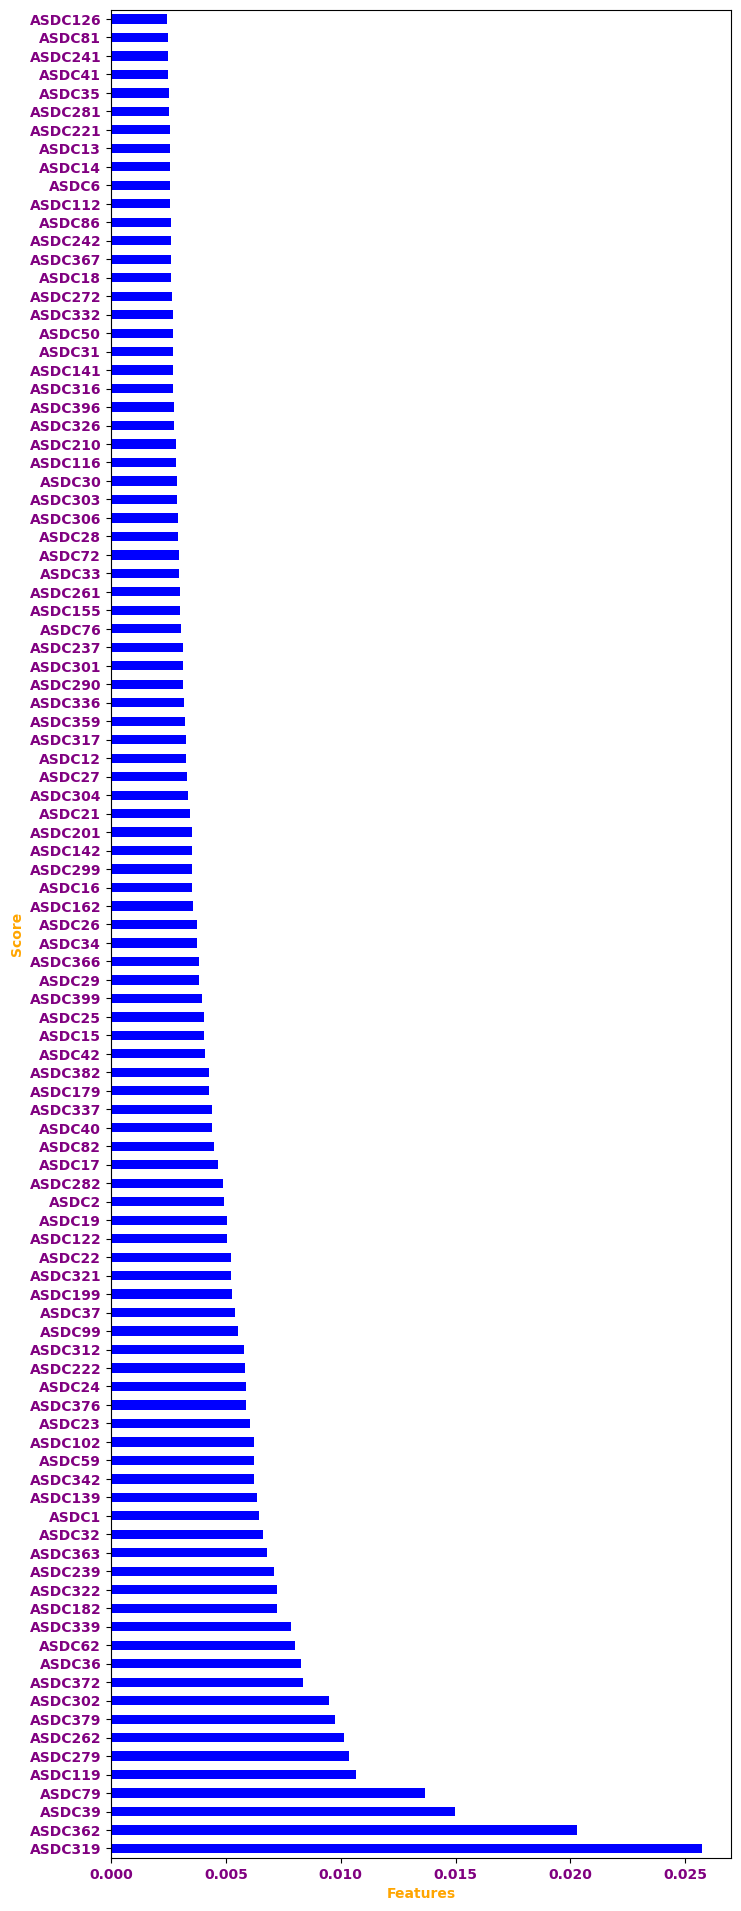

In [ ]:
plt.figure(figsize = (8, 24))
important_feature.nlargest(100).plot(kind = 'barh', color ='blue')
plt.xlabel('Features', fontweight = 'bold', color='orange')
plt.ylabel('Score', fontweight = 'bold', color='orange')
plt.xticks(fontweight = 'bold', color='purple')
plt.yticks(fontweight = 'bold', color='purple')

**NearMiss**

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()

In [ ]:
X, Y = nm.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(ASDC_NearMiss).csv")

0:	learn: 0.3479268	total: 73.8ms	remaining: 3.25s
1:	learn: 0.2206033	total: 129ms	remaining: 2.78s
2:	learn: 0.1561151	total: 185ms	remaining: 2.59s
3:	learn: 0.1052023	total: 241ms	remaining: 2.47s
4:	learn: 0.0799425	total: 301ms	remaining: 2.41s
5:	learn: 0.0660373	total: 359ms	remaining: 2.33s
6:	learn: 0.0587790	total: 415ms	remaining: 2.25s
7:	learn: 0.0529219	total: 470ms	remaining: 2.17s
8:	learn: 0.0405960	total: 531ms	remaining: 2.13s
9:	learn: 0.0297007	total: 588ms	remaining: 2.06s
10:	learn: 0.0242928	total: 643ms	remaining: 1.99s
11:	learn: 0.0176574	total: 699ms	remaining: 1.92s
12:	learn: 0.0136951	total: 771ms	remaining: 1.9s
13:	learn: 0.0104149	total: 842ms	remaining: 1.86s
14:	learn: 0.0093458	total: 897ms	remaining: 1.79s
15:	learn: 0.0085208	total: 954ms	remaining: 1.73s
16:	learn: 0.0074142	total: 1.01s	remaining: 1.67s
17:	learn: 0.0070495	total: 1.07s	remaining: 1.6s
18:	learn: 0.0058287	total: 1.13s	remaining: 1.55s
19:	learn: 0.0054032	total: 1.2s	remaining

**Analysis of Top-100 Features**

In [ ]:
top_100 = df4[['ASDC319', 'ASDC362', 'ASDC39', 'ASDC79', 'ASDC119', 'ASDC279', 'ASDC262', 'ASDC379', 'ASDC302', 'ASDC372', 'ASDC36', 'ASDC62', 'ASDC339', 'ASDC182', 'ASDC322', 'ASDC239', 'ASDC363',
               'ASDC32', 'ASDC1', 'ASDC139', 'ASDC342', 'ASDC59', 'ASDC102', 'ASDC23', 'ASDC376', 'ASDC24', 'ASDC222', 'ASDC312', 'ASDC99', 'ASDC37', 'ASDC199', 'ASDC321', 'ASDC22', 'ASDC122', 'ASDC19',
               'ASDC2', 'ASDC282', 'ASDC17', 'ASDC82', 'ASDC40', 'ASDC337', 'ASDC179', 'ASDC382', 'ASDC42', 'ASDC15', 'ASDC25', 'ASDC399', 'ASDC29', 'ASDC366', 'ASDC34', 'ASDC26', 'ASDC162', 'ASDC16',
               'ASDC299', 'ASDC142', 'ASDC201', 'ASDC21', 'ASDC304', 'ASDC27', 'ASDC12', 'ASDC317', 'ASDC359','ASDC336', 'ASDC290', 'ASDC301', 'ASDC237', 'ASDC76', 'ASDC155', 'ASDC261', 'ASDC33', 'ASDC72',
               'ASDC28', 'ASDC306', 'ASDC303', 'ASDC30', 'ASDC116', 'ASDC210', 'ASDC326', 'ASDC396', 'ASDC316', 'ASDC141', 'ASDC31', 'ASDC50', 'ASDC332', 'ASDC272', 'ASDC18', 'ASDC367', 'ASDC242', 'ASDC86',
               'ASDC112', 'ASDC6', 'ASDC14', 'ASDC13', 'ASDC221', 'ASDC281', 'ASDC35', 'ASDC41', 'ASDC241', 'ASDC81', 'ASDC126','Target']]

In [ ]:
X = top_100.drop(['Target'], axis=1)
Y = top_100['Target']
X, Y = nm.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(ASDC_NearMiss)1.csv")

0:	learn: 0.2283774	total: 60.5ms	remaining: 2.66s
1:	learn: 0.1488574	total: 71.7ms	remaining: 1.54s
2:	learn: 0.0962398	total: 82.5ms	remaining: 1.16s
3:	learn: 0.0658470	total: 93.2ms	remaining: 955ms
4:	learn: 0.0484869	total: 104ms	remaining: 829ms
5:	learn: 0.0379393	total: 114ms	remaining: 741ms
6:	learn: 0.0306097	total: 129ms	remaining: 701ms
7:	learn: 0.0239370	total: 140ms	remaining: 647ms
8:	learn: 0.0201089	total: 150ms	remaining: 601ms
9:	learn: 0.0172699	total: 161ms	remaining: 565ms
10:	learn: 0.0128196	total: 172ms	remaining: 531ms
11:	learn: 0.0118900	total: 183ms	remaining: 502ms
12:	learn: 0.0097956	total: 193ms	remaining: 475ms
13:	learn: 0.0078432	total: 216ms	remaining: 479ms
14:	learn: 0.0064212	total: 229ms	remaining: 458ms
15:	learn: 0.0052905	total: 240ms	remaining: 434ms
16:	learn: 0.0043277	total: 250ms	remaining: 412ms
17:	learn: 0.0039888	total: 261ms	remaining: 392ms
18:	learn: 0.0036133	total: 272ms	remaining: 372ms
19:	learn: 0.0033447	total: 283ms	rem

**Analysis of Top-50 Features**

In [ ]:
top_50 = df4[['ASDC319', 'ASDC362', 'ASDC39', 'ASDC79', 'ASDC119', 'ASDC279', 'ASDC262', 'ASDC379', 'ASDC302', 'ASDC372', 'ASDC36', 'ASDC62', 'ASDC339', 'ASDC182', 'ASDC322', 'ASDC239', 'ASDC363',
               'ASDC32', 'ASDC1', 'ASDC139', 'ASDC342', 'ASDC59', 'ASDC102', 'ASDC23', 'ASDC376', 'ASDC24', 'ASDC222', 'ASDC312', 'ASDC99', 'ASDC37', 'ASDC199', 'ASDC321', 'ASDC22', 'ASDC122', 'ASDC19',
               'ASDC2', 'ASDC282', 'ASDC17', 'ASDC82', 'ASDC40', 'ASDC337', 'ASDC179', 'ASDC382', 'ASDC42', 'ASDC15', 'ASDC25', 'ASDC399', 'ASDC29', 'ASDC366', 'ASDC34', 'Target']]

In [ ]:
X = top_50.drop(['Target'], axis=1)
Y = top_50['Target']
X, Y = nm.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(ASDC_NearMiss)2.csv")

0:	learn: 0.1921691	total: 17.2ms	remaining: 755ms
1:	learn: 0.1069778	total: 27.4ms	remaining: 590ms
2:	learn: 0.0832333	total: 33ms	remaining: 463ms
3:	learn: 0.0624300	total: 41.8ms	remaining: 428ms
4:	learn: 0.0550882	total: 55.6ms	remaining: 444ms
5:	learn: 0.0488060	total: 69ms	remaining: 449ms
6:	learn: 0.0427674	total: 79.6ms	remaining: 432ms
7:	learn: 0.0384019	total: 85.5ms	remaining: 395ms
8:	learn: 0.0277607	total: 93.5ms	remaining: 374ms
9:	learn: 0.0249961	total: 102ms	remaining: 356ms
10:	learn: 0.0211155	total: 107ms	remaining: 332ms
11:	learn: 0.0199141	total: 115ms	remaining: 317ms
12:	learn: 0.0183717	total: 123ms	remaining: 303ms
13:	learn: 0.0147056	total: 130ms	remaining: 289ms
14:	learn: 0.0126622	total: 136ms	remaining: 272ms
15:	learn: 0.0104590	total: 144ms	remaining: 261ms
16:	learn: 0.0097525	total: 152ms	remaining: 250ms
17:	learn: 0.0090004	total: 157ms	remaining: 236ms
18:	learn: 0.0081867	total: 164ms	remaining: 225ms
19:	learn: 0.0074375	total: 172ms	re

 **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

In [ ]:
X, Y = sm.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(ASDC_SMOTE).csv")

0:	learn: 0.4097910	total: 97ms	remaining: 4.27s
1:	learn: 0.3352209	total: 174ms	remaining: 3.75s
2:	learn: 0.2835547	total: 246ms	remaining: 3.44s
3:	learn: 0.2582467	total: 322ms	remaining: 3.3s
4:	learn: 0.2399188	total: 395ms	remaining: 3.16s
5:	learn: 0.2236590	total: 467ms	remaining: 3.03s
6:	learn: 0.2081494	total: 543ms	remaining: 2.95s
7:	learn: 0.1915878	total: 640ms	remaining: 2.96s
8:	learn: 0.1828921	total: 711ms	remaining: 2.85s
9:	learn: 0.1708522	total: 789ms	remaining: 2.76s
10:	learn: 0.1608770	total: 857ms	remaining: 2.65s
11:	learn: 0.1533223	total: 926ms	remaining: 2.55s
12:	learn: 0.1446140	total: 997ms	remaining: 2.45s
13:	learn: 0.1367262	total: 1.07s	remaining: 2.38s
14:	learn: 0.1297095	total: 1.15s	remaining: 2.3s
15:	learn: 0.1252885	total: 1.22s	remaining: 2.21s
16:	learn: 0.1164984	total: 1.3s	remaining: 2.13s
17:	learn: 0.1079917	total: 1.37s	remaining: 2.06s
18:	learn: 0.1037052	total: 1.44s	remaining: 1.98s
19:	learn: 0.0973710	total: 1.52s	remaining: 

**Analysis of Top-100 Features**

In [ ]:
top_100 = df4[['ASDC319', 'ASDC362', 'ASDC39', 'ASDC79', 'ASDC119', 'ASDC279', 'ASDC262', 'ASDC379', 'ASDC302', 'ASDC372', 'ASDC36', 'ASDC62', 'ASDC339', 'ASDC182', 'ASDC322', 'ASDC239', 'ASDC363',
               'ASDC32', 'ASDC1', 'ASDC139', 'ASDC342', 'ASDC59', 'ASDC102', 'ASDC23', 'ASDC376', 'ASDC24', 'ASDC222', 'ASDC312', 'ASDC99', 'ASDC37', 'ASDC199', 'ASDC321', 'ASDC22', 'ASDC122', 'ASDC19',
               'ASDC2', 'ASDC282', 'ASDC17', 'ASDC82', 'ASDC40', 'ASDC337', 'ASDC179', 'ASDC382', 'ASDC42', 'ASDC15', 'ASDC25', 'ASDC399', 'ASDC29', 'ASDC366', 'ASDC34', 'ASDC26', 'ASDC162', 'ASDC16',
               'ASDC299', 'ASDC142', 'ASDC201', 'ASDC21', 'ASDC304', 'ASDC27', 'ASDC12', 'ASDC317', 'ASDC359','ASDC336', 'ASDC290', 'ASDC301', 'ASDC237', 'ASDC76', 'ASDC155', 'ASDC261', 'ASDC33', 'ASDC72',
               'ASDC28', 'ASDC306', 'ASDC303', 'ASDC30', 'ASDC116', 'ASDC210', 'ASDC326', 'ASDC396', 'ASDC316', 'ASDC141', 'ASDC31', 'ASDC50', 'ASDC332', 'ASDC272', 'ASDC18', 'ASDC367', 'ASDC242', 'ASDC86',
               'ASDC112', 'ASDC6', 'ASDC14', 'ASDC13', 'ASDC221', 'ASDC281', 'ASDC35', 'ASDC41', 'ASDC241', 'ASDC81', 'ASDC126','Target']]

In [ ]:
X = top_100.drop(['Target'], axis=1)
Y = top_100['Target']
X, Y = sm.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(ASDC_SMOTE)1.csv")

0:	learn: 0.3951703	total: 29.5ms	remaining: 1.3s
1:	learn: 0.3448103	total: 67.7ms	remaining: 1.45s
2:	learn: 0.3010453	total: 106ms	remaining: 1.48s
3:	learn: 0.2846181	total: 148ms	remaining: 1.52s
4:	learn: 0.2638117	total: 184ms	remaining: 1.47s
5:	learn: 0.2477503	total: 223ms	remaining: 1.45s
6:	learn: 0.2354250	total: 255ms	remaining: 1.39s
7:	learn: 0.2217315	total: 301ms	remaining: 1.39s
8:	learn: 0.2136574	total: 342ms	remaining: 1.37s
9:	learn: 0.2039839	total: 384ms	remaining: 1.34s
10:	learn: 0.1929730	total: 418ms	remaining: 1.29s
11:	learn: 0.1833322	total: 438ms	remaining: 1.2s
12:	learn: 0.1751724	total: 480ms	remaining: 1.18s
13:	learn: 0.1621685	total: 522ms	remaining: 1.16s
14:	learn: 0.1537358	total: 566ms	remaining: 1.13s
15:	learn: 0.1482985	total: 601ms	remaining: 1.09s
16:	learn: 0.1419461	total: 621ms	remaining: 1.02s
17:	learn: 0.1331315	total: 642ms	remaining: 963ms
18:	learn: 0.1272898	total: 661ms	remaining: 905ms
19:	learn: 0.1211120	total: 706ms	remaini

**Analysis of Top-50 Features**

In [ ]:
top_50 = df4[['ASDC319', 'ASDC362', 'ASDC39', 'ASDC79', 'ASDC119', 'ASDC279', 'ASDC262', 'ASDC379', 'ASDC302', 'ASDC372', 'ASDC36', 'ASDC62', 'ASDC339', 'ASDC182', 'ASDC322', 'ASDC239', 'ASDC363',
               'ASDC32', 'ASDC1', 'ASDC139', 'ASDC342', 'ASDC59', 'ASDC102', 'ASDC23', 'ASDC376', 'ASDC24', 'ASDC222', 'ASDC312', 'ASDC99', 'ASDC37', 'ASDC199', 'ASDC321', 'ASDC22', 'ASDC122', 'ASDC19',
               'ASDC2', 'ASDC282', 'ASDC17', 'ASDC82', 'ASDC40', 'ASDC337', 'ASDC179', 'ASDC382', 'ASDC42', 'ASDC15', 'ASDC25', 'ASDC399', 'ASDC29', 'ASDC366', 'ASDC34', 'Target']]

In [ ]:
X = top_50.drop(['Target'], axis=1)
Y = top_50['Target']
X, Y = sm.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(ASDC_SMOTE)2.csv")

0:	learn: 0.4124974	total: 10.1ms	remaining: 444ms
1:	learn: 0.3639547	total: 19.8ms	remaining: 426ms
2:	learn: 0.3304800	total: 29.4ms	remaining: 412ms
3:	learn: 0.3055375	total: 38.8ms	remaining: 397ms
4:	learn: 0.2890994	total: 48.3ms	remaining: 386ms
5:	learn: 0.2724105	total: 58ms	remaining: 377ms
6:	learn: 0.2576981	total: 67.6ms	remaining: 367ms
7:	learn: 0.2426337	total: 77.5ms	remaining: 359ms
8:	learn: 0.2368466	total: 86.6ms	remaining: 346ms
9:	learn: 0.2236902	total: 96.2ms	remaining: 337ms
10:	learn: 0.2159776	total: 106ms	remaining: 326ms
11:	learn: 0.2069513	total: 115ms	remaining: 317ms
12:	learn: 0.1990322	total: 125ms	remaining: 307ms
13:	learn: 0.1941644	total: 134ms	remaining: 296ms
14:	learn: 0.1866746	total: 143ms	remaining: 286ms
15:	learn: 0.1781091	total: 152ms	remaining: 276ms
16:	learn: 0.1705731	total: 162ms	remaining: 266ms
17:	learn: 0.1639853	total: 171ms	remaining: 257ms
18:	learn: 0.1566651	total: 181ms	remaining: 247ms
19:	learn: 0.1496148	total: 190ms

**ADASYN**

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)

In [ ]:
X, Y = ada.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(ASDC_ADASYN).csv")

0:	learn: 0.4691658	total: 98.8ms	remaining: 4.34s
1:	learn: 0.3851957	total: 175ms	remaining: 3.76s
2:	learn: 0.3346525	total: 251ms	remaining: 3.51s
3:	learn: 0.3021821	total: 333ms	remaining: 3.41s
4:	learn: 0.2738380	total: 408ms	remaining: 3.26s
5:	learn: 0.2579261	total: 480ms	remaining: 3.12s
6:	learn: 0.2373957	total: 560ms	remaining: 3.04s
7:	learn: 0.2285562	total: 632ms	remaining: 2.92s
8:	learn: 0.2127894	total: 702ms	remaining: 2.81s
9:	learn: 0.1999149	total: 780ms	remaining: 2.73s
10:	learn: 0.1898428	total: 852ms	remaining: 2.63s
11:	learn: 0.1790002	total: 928ms	remaining: 2.55s
12:	learn: 0.1690394	total: 1.02s	remaining: 2.51s
13:	learn: 0.1604243	total: 1.1s	remaining: 2.44s
14:	learn: 0.1518496	total: 1.18s	remaining: 2.36s
15:	learn: 0.1418282	total: 1.27s	remaining: 2.29s
16:	learn: 0.1338203	total: 1.35s	remaining: 2.22s
17:	learn: 0.1267320	total: 1.42s	remaining: 2.13s
18:	learn: 0.1171436	total: 1.5s	remaining: 2.06s
19:	learn: 0.1097548	total: 1.58s	remainin

**Analysis of Top-100 Features**

In [ ]:
top_100 = df4[['ASDC319', 'ASDC362', 'ASDC39', 'ASDC79', 'ASDC119', 'ASDC279', 'ASDC262', 'ASDC379', 'ASDC302', 'ASDC372', 'ASDC36', 'ASDC62', 'ASDC339', 'ASDC182', 'ASDC322', 'ASDC239', 'ASDC363',
               'ASDC32', 'ASDC1', 'ASDC139', 'ASDC342', 'ASDC59', 'ASDC102', 'ASDC23', 'ASDC376', 'ASDC24', 'ASDC222', 'ASDC312', 'ASDC99', 'ASDC37', 'ASDC199', 'ASDC321', 'ASDC22', 'ASDC122', 'ASDC19',
               'ASDC2', 'ASDC282', 'ASDC17', 'ASDC82', 'ASDC40', 'ASDC337', 'ASDC179', 'ASDC382', 'ASDC42', 'ASDC15', 'ASDC25', 'ASDC399', 'ASDC29', 'ASDC366', 'ASDC34', 'ASDC26', 'ASDC162', 'ASDC16',
               'ASDC299', 'ASDC142', 'ASDC201', 'ASDC21', 'ASDC304', 'ASDC27', 'ASDC12', 'ASDC317', 'ASDC359','ASDC336', 'ASDC290', 'ASDC301', 'ASDC237', 'ASDC76', 'ASDC155', 'ASDC261', 'ASDC33', 'ASDC72',
               'ASDC28', 'ASDC306', 'ASDC303', 'ASDC30', 'ASDC116', 'ASDC210', 'ASDC326', 'ASDC396', 'ASDC316', 'ASDC141', 'ASDC31', 'ASDC50', 'ASDC332', 'ASDC272', 'ASDC18', 'ASDC367', 'ASDC242', 'ASDC86',
               'ASDC112', 'ASDC6', 'ASDC14', 'ASDC13', 'ASDC221', 'ASDC281', 'ASDC35', 'ASDC41', 'ASDC241', 'ASDC81', 'ASDC126','Target']]

In [ ]:
X = top_100.drop(['Target'], axis=1)
Y = top_100['Target']
X, Y = ada.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(ASDC_ADASYN)1.csv")

0:	learn: 0.4907790	total: 39.5ms	remaining: 1.74s
1:	learn: 0.4178560	total: 82.2ms	remaining: 1.77s
2:	learn: 0.3781939	total: 117ms	remaining: 1.64s
3:	learn: 0.3430552	total: 150ms	remaining: 1.53s
4:	learn: 0.3201241	total: 190ms	remaining: 1.52s
5:	learn: 0.3000940	total: 222ms	remaining: 1.44s
6:	learn: 0.2841533	total: 266ms	remaining: 1.44s
7:	learn: 0.2616844	total: 307ms	remaining: 1.42s
8:	learn: 0.2437328	total: 341ms	remaining: 1.36s
9:	learn: 0.2291612	total: 383ms	remaining: 1.34s
10:	learn: 0.2166390	total: 416ms	remaining: 1.29s
11:	learn: 0.2100820	total: 450ms	remaining: 1.24s
12:	learn: 0.2052160	total: 494ms	remaining: 1.22s
13:	learn: 0.1940835	total: 535ms	remaining: 1.18s
14:	learn: 0.1840342	total: 577ms	remaining: 1.15s
15:	learn: 0.1765085	total: 612ms	remaining: 1.11s
16:	learn: 0.1647835	total: 654ms	remaining: 1.08s
17:	learn: 0.1572159	total: 701ms	remaining: 1.05s
18:	learn: 0.1500320	total: 739ms	remaining: 1.01s
19:	learn: 0.1436927	total: 776ms	remai

**Analysis of Top-50 Features**

In [ ]:
top_50 = df4[['ASDC319', 'ASDC362', 'ASDC39', 'ASDC79', 'ASDC119', 'ASDC279', 'ASDC262', 'ASDC379', 'ASDC302', 'ASDC372', 'ASDC36', 'ASDC62', 'ASDC339', 'ASDC182', 'ASDC322', 'ASDC239', 'ASDC363',
               'ASDC32', 'ASDC1', 'ASDC139', 'ASDC342', 'ASDC59', 'ASDC102', 'ASDC23', 'ASDC376', 'ASDC24', 'ASDC222', 'ASDC312', 'ASDC99', 'ASDC37', 'ASDC199', 'ASDC321', 'ASDC22', 'ASDC122', 'ASDC19',
               'ASDC2', 'ASDC282', 'ASDC17', 'ASDC82', 'ASDC40', 'ASDC337', 'ASDC179', 'ASDC382', 'ASDC42', 'ASDC15', 'ASDC25', 'ASDC399', 'ASDC29', 'ASDC366', 'ASDC34', 'Target']]

In [ ]:
X = top_50.drop(['Target'], axis=1)
Y = top_50['Target']
X, Y = ada.fit_resample(X, Y)

In [ ]:
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3)
# create model
models = [RandomForestClassifier(n_estimators = 450, max_depth = 9),
          XGBClassifier(n_estimators = 200,max_depth = 3, base_score = 0.1, eval_metric = 'mlogloss', learning_rate = 0.1),
          CatBoostClassifier(depth= 5, iterations = 45, learning_rate = 0.77),
          LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75),
          Stacking]
for model in models:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  model.fit(xtrain, ytrain)
  pred = model.predict(xtest)

  # cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(ytest, pred)
  mcc = matthews_corrcoef(ytest, pred)

  kappa = cohen_kappa_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  precision_score = precision_score(ytest, pred)
  recall_score = recall_score(ytest, pred)
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1 ]

print(total_Metics)
total_Metics.to_csv("total_Metics(ASDC_ADASYN)2.csv")

0:	learn: 0.5410756	total: 10.1ms	remaining: 446ms
1:	learn: 0.4757336	total: 20.4ms	remaining: 438ms
2:	learn: 0.4389034	total: 30.1ms	remaining: 421ms
3:	learn: 0.4049205	total: 40.3ms	remaining: 413ms
4:	learn: 0.3844101	total: 49.5ms	remaining: 396ms
5:	learn: 0.3519223	total: 59.3ms	remaining: 385ms
6:	learn: 0.3373902	total: 69.5ms	remaining: 377ms
7:	learn: 0.3246681	total: 79.3ms	remaining: 367ms
8:	learn: 0.3063837	total: 88.8ms	remaining: 355ms
9:	learn: 0.2925026	total: 98.5ms	remaining: 345ms
10:	learn: 0.2803298	total: 109ms	remaining: 337ms
11:	learn: 0.2675902	total: 120ms	remaining: 331ms
12:	learn: 0.2573464	total: 130ms	remaining: 320ms
13:	learn: 0.2461499	total: 139ms	remaining: 308ms
14:	learn: 0.2346539	total: 149ms	remaining: 299ms
15:	learn: 0.2223414	total: 160ms	remaining: 290ms
16:	learn: 0.2143043	total: 170ms	remaining: 280ms
17:	learn: 0.2036847	total: 179ms	remaining: 269ms
18:	learn: 0.1964503	total: 188ms	remaining: 257ms
19:	learn: 0.1862434	total: 197